# Load eCLIPs

In [1]:
import pandas as pd

In [2]:
gene_conversion = pd.read_csv('../../../ReferenceData/enst_ensg_genename.txt', sep='\t')
gene_conversion = gene_conversion.drop_duplicates(['Gene stable ID', 'Gene name'])
gene_conversion.index = gene_conversion['Gene name']

gene_lengths = pd.read_csv('gene_transcript_lengths/length_per_gene.tsv', sep='\t', index_col=0)

cterminus_edit_c_per_gene = pd.read_csv('../peak_calling/edit_c_for_all_genes.tsv', sep='\t', index_col=0)
cterminus_edit_c_per_gene = cterminus_edit_c_per_gene.join(gene_conversion, how='inner')
cterminus_edit_c_per_gene['stable_geneid'] = cterminus_edit_c_per_gene['Gene stable ID']
cterminus_edit_c_per_gene = cterminus_edit_c_per_gene.join(gene_lengths, on='stable_geneid', how='inner')
cterminus_edit_c_per_gene['normalized_coverage'] = cterminus_edit_c_per_gene['coverage_rbfox2_1000'].divide(cterminus_edit_c_per_gene['length'])


### Annotate eCLIP individual replicate files

In [3]:
slbp_idr_path = '/home/bay001/projects/kris_apobec_20200121/reference_data/SLBP_K562_IDR.bed'
all_beds = [
    slbp_idr_path
]

#### set thresholds

In [4]:
l2fc_threshold = 2
l10p_threshold = 3

In [5]:
import pandas as pd

### Native eCLIP 

In [6]:

native_eclip_path = '../../Original_eCLIP_and_STAMP_data/RBFOX2/eCLIP/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'

native_eclip_df = pd.read_csv(native_eclip_path, sep='\t', 
                             names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'annot', 'geneid'])
                    

In [7]:
native_eclip_df.l10p.min()

-7.911911657989299

In [8]:
native_eclip_df['region'] = [i.split('|')[0] for i in native_eclip_df.annot]

In [9]:
native_eclip_df = native_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'geneid', 'region']]

In [10]:
native_eclip_df = native_eclip_df[(native_eclip_df.l2fc > l2fc_threshold) & (native_eclip_df.l10p > l10p_threshold)]

In [11]:
native_eclip_df.groupby('region').count()

,chrom,start,end,l2fc,l10p,strand,geneid
region,,,,,,,
3utr,460,460,460,460,460,460,460
5utr,144,144,144,144,144,144,144
CDS,274,274,274,274,274,274,274
intron,7346,7346,7346,7346,7346,7346,7346
noncoding_exon,164,164,164,164,164,164,164
noncoding_intron,365,365,365,365,365,365,365


In [12]:
len(native_eclip_df)

8753

### N Terminal eCLIP

In [13]:
import pandas as pd

In [14]:
#nterminal_eclip_path = '../../../New_STAMP_framework/Original_eCLIP_and_STAMP_data/RBFOX2_n_terminus/eCLIP/ApoFox_reproducible_peaks.annotated'

# One replicate
#nterminal_eclip_path = '/home/bay001/projects/ryan_editing_20190314/permanent_data/pipeline_outputs/APOBEC_seq.ApoFox_IP1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.bed'
# Annotated
#nterminal_eclip_path = 'annotated_eclips/APOBEC_seq.ApoFox_IP1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.annotated'

# Other replicate
#nterminal_eclip_path = '/home/bay001/projects/ryan_editing_20190314/permanent_data/pipeline_outputs/APOBEC_seq.ApoFox_IP2.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.bed'
# Annotated
nterminal_eclip_path = 'annotated_eclips/APOBEC_seq.ApoFox_IP2.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.annotated'


nterminus_eclip_df = pd.read_csv(nterminal_eclip_path, sep='\t', 
                                           names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'geneid', 'genename', 'region', 'annot'])

nterminus_eclip_df = nterminus_eclip_df[(nterminus_eclip_df.l2fc > l2fc_threshold) & (nterminus_eclip_df.l10p > l10p_threshold)]

In [15]:
len(nterminus_eclip_df)

15372

In [16]:
nterminus_eclip_df.head()

,chrom,start,end,l2fc,l10p,strand,geneid,genename,region,annot
0,chr7,127231471,127231624,400.000000,4.697846,+,ENSG00000004059.6,ARF5,3utr,ENSG00000004059.6:127228398:127231759:+:gene:E...
1,chr7,157209693,157209853,63.482052,4.969795,+,ENSG00000105993.10,DNAJB6,3utr,ENSG00000105993.10:157128074:157210133:+:gene:...
2,chr7,73609873,73609984,57.928744,3.559406,+,ENSG00000106682.10,EIF4H,3utr,ENSG00000106682.10:73588574:73611431:+:gene:EN...
3,chr7,127231644,127231736,56.788479,4.067465,+,ENSG00000004059.6,ARF5,3utr,ENSG00000004059.6:127228398:127231759:+:gene:E...
4,chr7,26252757,26252905,53.938284,3.475454,+,ENSG00000122565.14,CBX3,3utr,ENSG00000122565.14:26240781:26252976:+:gene:EN...


In [17]:
nterminus_eclip_df.groupby('region').count()

,chrom,start,end,l2fc,l10p,strand,geneid,genename,annot
region,,,,,,,,,
3utr,11268,11268,11268,11268,11268,11268,11268,11268,11268
5utr,110,110,110,110,110,110,110,110,110
CDS,2275,2275,2275,2275,2275,2275,2275,2275,2275
distintron500,937,937,937,937,937,937,937,937,937
distnoncoding_intron500,111,111,111,111,111,111,111,111,111
intergenic,3,3,3,3,3,3,3,3,3
miRNA,1,1,1,1,1,1,1,1,1
noncoding_exon,309,309,309,309,309,309,309,309,309
proxintron500,316,316,316,316,316,316,316,316,316


In [18]:
nterminus_eclip_df.l2fc.min()

2.0989495728931002

### C Terminal eCLIP

In [19]:
import pandas as pd

# C-Terminus IDR eCLIP BED
#cterminus_bed_path = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_eclip/IDR/kris_apobec/results/PRBF_1.vs.PRBF_2.bed'
#cterminus_bed_path = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_eclip/annotator/outputs/PRBF_1.vs.PRBF_2.bed.annotated'
# One replicate
#cterminus_bed_path = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_eclip/IDR/inputs/STAMP.PRBF_1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.bed'
# Annotated
cterminus_bed_path = 'annotated_eclips/STAMP.PRBF_1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.annotated'

# Annotated IDR
cterminus_eclip_df = pd.read_csv(
    cterminus_bed_path, 
    sep='\t',
    names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'geneid', 'genename', 'region', 'annot']
)

cterminus_eclip_df = cterminus_eclip_df[(cterminus_eclip_df.l2fc > l2fc_threshold) & (cterminus_eclip_df.l10p > l10p_threshold)]

# Non-annotated 
#cterminus_eclip_df = pd.read_csv(cterminus_bed_path, sep='\t', names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand'])
#cterminus_eclip_df = cterminus_eclip_df[(cterminus_eclip_df.l2fc > l2fc_threshold) & (cterminus_eclip_df.l10p > l10p_threshold)]

In [20]:
len(cterminus_eclip_df)

16872

In [21]:
cterminus_eclip_df.head()

,chrom,start,end,l2fc,l10p,strand,geneid,genename,region,annot
0,chr7,135359521,135359688,55.366984,5.375384,+,ENSG00000243317.3,C7orf73,3utr,ENSG00000243317.3:135347243:135378166:+:gene:E...
1,chr7,115898628,115898658,50.036765,6.161151,+,ENSG00000135269.13,TES,3utr,ENSG00000135269.13:115850546:115898837:+:gene:...
2,chr7,115898574,115898628,48.999360,6.135615,+,ENSG00000135269.13,TES,3utr,ENSG00000135269.13:115850546:115898837:+:gene:...
3,chr7,6443202,6443243,43.303183,5.052774,+,ENSG00000136238.13,RAC1,3utr,ENSG00000136238.13:6414153:6443608:+:gene:ENSG...
4,chr7,26252817,26252895,41.718747,5.379923,+,ENSG00000122565.14,CBX3,3utr,ENSG00000122565.14:26240781:26252976:+:gene:EN...


In [22]:
cterminus_eclip_df.groupby('region').count()

,chrom,start,end,l2fc,l10p,strand,geneid,genename,annot
region,,,,,,,,,
3utr,10135,10135,10135,10135,10135,10135,10135,10135,10135
5utr,2111,2111,2111,2111,2111,2111,2111,2111,2111
CDS,3906,3906,3906,3906,3906,3906,3906,3906,3906
distintron500,255,255,255,255,255,255,255,255,255
distnoncoding_intron500,63,63,63,63,63,63,63,63,63
intergenic,8,8,8,8,8,8,8,8,8
miRNA,5,5,5,5,5,5,5,5,5
noncoding_exon,269,269,269,269,269,269,269,269,269
proxintron500,87,87,87,87,87,87,87,87,87


In [23]:
cterminus_eclip_df.l2fc.min()

2.13564136407156

## TIA1A c-terminus eCLIP

In [24]:
#tia1_idr_eclip_path = 'annotated_eclips/PTIA_1.vs.PTIA_2.annotated'
tia1_rep1_eclip_path = 'annotated_eclips/STAMP.PTIA_1.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.normed.annotated.compressed.annotated'
tia1_rep2_eclip_path = 'annotated_eclips/STAMP.PTIA_2.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.normed.annotated.compressed.annotated'

tia1_eclip_path = tia1_rep1_eclip_path


tia1_eclip_df = pd.read_csv(tia1_eclip_path,
                               sep='\t',
                                names=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand', 'geneid', 'genename', 'region', 'annot']
                               )

In [25]:
tia1_eclip_df = tia1_eclip_df[
    (tia1_eclip_df.l2fc > l2fc_threshold) &
    (tia1_eclip_df.l10p > l10p_threshold)
]

# Load STAMPs

In [26]:
# C terminus STAMP windows
cterminal_stamp_windows = pd.read_csv('../window_intersecting/STAMP_windows.tsv', sep='\t', index_col=0)

In [27]:
#features = pd.read_csv('../../2_DataExploration/prepped_data/200_window_2_l2fc_20_slop_fixed_flanking_rbfox2_1000_cleaned.tsv', sep='\t', index_col=0)
#rbfox2_50_features = features[features.source.isin(['RBFOX2_tp', 'RBFOX2_fp', 'RBFOX2_poor_eclip'])]

rbfox2_50_stamp_windows = pd.read_csv('../window_intersecting/STAMP_windows_50.tsv', sep='\t', index_col=0)

In [28]:
#rbfox2_50_features = rbfox2_50_features[['chrom_stamp', 'start_stamp', 'end_stamp', 'strand_stamp', 'num_edited_stamp', 'total_coverage_stamp', 'genename']]
#rbfox2_50_features.columns = ['chrom', 'start', 'end', 'strand', 'num_edited', 'total_coverage', 'genename']

In [29]:
#rbfox2_0_features = pd.read_csv('/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-0_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated',
#                               sep='\t', names=['chrom', 'start', 'end', 'conf',
#                                                'coverage', 'strand', 'geneid', 'genename', 'region', 'annot'])

rbfox2_0_stamp_windows = pd.read_csv('../window_intersecting/STAMP_windows_0.tsv', sep='\t', index_col=0)


In [30]:
control_windows = pd.read_csv('../window_intersecting/control_STAMP_windows.tsv', sep='\t', index_col=0)

In [31]:
# N Terminus STAMP windows
import pandas as pd
nterminal_stamp_windows_R1 = pd.read_csv('../NTerminusSTAMP/R1.with_conf.tsv', sep='\t', index_col=0)
nterminal_stamp_windows_R3 = pd.read_csv('../NTerminusSTAMP/R3.with_conf.tsv', sep='\t', index_col=0)

In [32]:
# SC Aggregate RBFOX2 STAMP sites
sc_aggregate_stamp_windows = pd.read_csv('../../Original_eCLIP_and_STAMP_data/RBFOX2_sc/STAMP/RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.rand844.trial-0.txt.fx.annotated',
                                         sep='\t', names=['chrom', 'start', 'end', 'conf', 'coverage', 'strand', 'geneid', 'genename', 'region', 'annot'])
sc_aggregate_stamp_windows = sc_aggregate_stamp_windows[sc_aggregate_stamp_windows.region != 'intergenic']
sc_aggregate_stamp_windows['score'] = sc_aggregate_stamp_windows.conf
sc_aggregate_stamp_windows.start = sc_aggregate_stamp_windows.start - 25 
sc_aggregate_stamp_windows.end = sc_aggregate_stamp_windows.end + 25

In [33]:
def add_index(r):
    return '{}:{}-{}'.format(r.chrom, r.start, r.end)


In [34]:
from collections import defaultdict
import pandas as pd

adar_paths = {
    'ADAR_72hr_low_R1': {
        'annotated': '/home/rmarina/scratch/20201204_temp_download_basespace/processing/02_combining_beds/outputs/adar/NA-11_S44_combined_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.noRmDup.annotated',
    },
    'ADAR_72hr_hi_R1': {
        'annotated': '/home/rmarina/scratch/20201204_temp_download_basespace/processing/02_combining_beds/outputs/adar/NA-12_S45_combined_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.noRmDup.annotated',
    },
    'ADAR_72hr_hi_R2': {
        'annotated': '/home/rmarina/scratch/20201204_temp_download_basespace/processing/02_combining_beds/outputs/adar/NA-13_S46_combined_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.noRmDup.annotated',
    }
}

adar_dfs = defaultdict()

for label, path in adar_paths.items():
    print(label)
    df = pd.read_csv(path.get('annotated'), sep='\t', names=['chrom', 'start', 'end', 'conf',
                                            'coverage', 'strand', 'geneid', 'genename', 'region', 'annot'])
    df.start = df.start - 25
    df.end = df.end + 25
    
    df['score'] = df.conf
    
    print(len(df))
    df = df[df.region != 'intergenic']
    print(len(df))
    
    df.index = df.apply(add_index, axis=1)
    adar_dfs[label] = df

ADAR_72hr_low_R1
146289
130827
ADAR_72hr_hi_R1
237965
216937
ADAR_72hr_hi_R2
250058
231492


In [35]:

sc_aggregate_stamp_windows.index = sc_aggregate_stamp_windows.apply(add_index, axis=1)

In [36]:
# tia1_bulk replicate 1 STAMP sites
tia1_bulk_stamp_windows = pd.read_csv('../../Original_eCLIP_and_STAMP_data/TIA1/STAMP/Tia1_1000ng_1_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated',
                                      sep='\t', 
                                      names=['chrom', 'start', 'end', 'conf', 'coverage', 'strand', 'geneid', 'genename', 'region', 'annot'])
tia1_bulk_stamp_windows = tia1_bulk_stamp_windows[tia1_bulk_stamp_windows.region != 'intergenic']
tia1_bulk_stamp_windows['score'] = tia1_bulk_stamp_windows.conf
tia1_bulk_stamp_windows.start = tia1_bulk_stamp_windows.start - 25 
tia1_bulk_stamp_windows.end = tia1_bulk_stamp_windows.end + 25

In [37]:
# tia1 sc aggregate STAMP sites
#tia1_sc_aggregate_path = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-33_barcodes.tsv.fx.annotated'
# Deeper sequencing
tia1_sc_aggregate_path = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-33_barcodes.tsv.fx.annotated'

tia1_sc_aggregate_stamp_windows = pd.read_csv(tia1_sc_aggregate_path,
                                             sep='\t', 
                                             names=['chrom', 'start', 'end', 'conf', 'coverage', 'strand', 'geneid', 'genename', 'region', 'annot'])
tia1_sc_aggregate_stamp_windows = tia1_sc_aggregate_stamp_windows[tia1_sc_aggregate_stamp_windows.region != 'intergenic']
tia1_sc_aggregate_stamp_windows['score'] = tia1_sc_aggregate_stamp_windows.conf
tia1_sc_aggregate_stamp_windows.start = tia1_sc_aggregate_stamp_windows.start - 25 
tia1_sc_aggregate_stamp_windows.end = tia1_sc_aggregate_stamp_windows.end + 25

In [38]:
len(pd.read_csv('/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-33_barcodes.tsv.fx.annotated',
            sep='\t', 
            names=['chrom', 'start', 'end', 'conf', 'coverage', 'strand', 'geneid', 'genename', 'region', 'annot']
           ).geneid.unique())

9193

In [39]:
len(pd.read_csv('/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-33_barcodes.tsv.fx.annotated',
                sep='\t', 
            names=['chrom', 'start', 'end', 'conf', 'coverage', 'strand', 'geneid', 'genename', 'region', 'annot']
           ).geneid.unique())

9193

# Load Poisson Filters

In [40]:
cterminal_poisson_annotation = pd.read_csv('preprocessed_filters/cterminal_poisson_annotation.tsv', sep='\t', index_col=0)

In [41]:
rbfox2_50_poisson_annotation = pd.read_csv('preprocessed_filters/rbfox2_50_poisson_filtering_information.tsv', sep='\t', index_col=0)

In [42]:
rbfox2_0_poisson_annotation = pd.read_csv('preprocessed_filters/rbfox2_0_poisson_filtering_information.tsv', sep='\t', index_col=0)

In [43]:
rbfox2_sc_agg_poisson_annotation = pd.read_csv('preprocessed_filters/rbfox2_sc_agg_poisson_filtering_information.tsv', sep='\t', index_col=0)

In [44]:
nterminal_poisson_annotation = pd.read_csv('preprocessed_filters/nterminal_poisson_annotation.tsv', sep='\t', index_col=0)

In [45]:
control_poisson_annotation = pd.read_csv('preprocessed_filters/control_1000_poisson_annotation.tsv', sep='\t', index_col=0)

In [46]:
ADAR_72hr_low_R1_poisson_annotation = pd.read_csv('preprocessed_filters/ADAR_72hr_low_R1_poisson_filtering_information.tsv',
                                                 sep='\t', index_col=0)

In [47]:
ADAR_72hr_hi_R1_poisson_annotation = pd.read_csv('preprocessed_filters/ADAR_72hr_hi_R1_poisson_filtering_information.tsv',
                                                 sep='\t', index_col=0)

In [48]:
ADAR_72hr_hi_R2_poisson_annotation = pd.read_csv('preprocessed_filters/ADAR_72hr_hi_R2_poisson_filtering_information.tsv',
                                                 sep='\t', index_col=0)

In [49]:
def reindex_poisson(r):
    return '{}:{}-{}'.format(r.chrom_stamp, int(r.start_stamp-25), int(r.end_stamp+25))

control_poisson_annotation.index = control_poisson_annotation.apply(reindex_poisson, axis=1)
rbfox2_50_poisson_annotation.index = rbfox2_50_poisson_annotation.apply(reindex_poisson, axis=1)
rbfox2_0_poisson_annotation.index = rbfox2_0_poisson_annotation.apply(reindex_poisson, axis=1)
rbfox2_sc_agg_poisson_annotation.index = rbfox2_sc_agg_poisson_annotation.apply(reindex_poisson, axis=1)

ADAR_72hr_low_R1_poisson_annotation.index = ADAR_72hr_low_R1_poisson_annotation.apply(reindex_poisson, axis=1)
ADAR_72hr_hi_R1_poisson_annotation.index = ADAR_72hr_hi_R1_poisson_annotation.apply(reindex_poisson, axis=1)
ADAR_72hr_hi_R2_poisson_annotation.index = ADAR_72hr_hi_R2_poisson_annotation.apply(reindex_poisson, axis=1)


# Load Neural Net Filters

# Filter windows

In [50]:
filter_with_poisson = True
p_shrinker = 100

filter_with_nn = False

filter_with_score = True
#score_threshold = 0.999
score_threshold = 0.999


In [52]:
cterminal_stamp_windows_w_filters = cterminal_stamp_windows.join(cterminal_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')

In [53]:
rbfox2_50_stamp_windows_w_filters = rbfox2_50_stamp_windows.join(rbfox2_50_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')\


In [54]:
rbfox2_0_stamp_windows_w_filters = rbfox2_0_stamp_windows.join(rbfox2_0_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')\


In [55]:
rbfox2_sc_aggregate_stamp_windows_w_filters = sc_aggregate_stamp_windows.join(rbfox2_sc_agg_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')\



In [56]:
ADAR_72hr_low_R1_w_filters = adar_dfs['ADAR_72hr_low_R1'].join(ADAR_72hr_low_R1_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')
ADAR_72hr_hi_R1_w_filters = adar_dfs['ADAR_72hr_hi_R1'].join(ADAR_72hr_hi_R1_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')
ADAR_72hr_hi_R2_w_filters = adar_dfs['ADAR_72hr_hi_R2'].join(ADAR_72hr_hi_R2_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')



In [60]:
nterminal_stamp_windows_w_filters = nterminal_stamp_windows_R1.join(nterminal_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']], how='left')

In [61]:
control_stamp_windows_w_filters = control_windows.join(control_poisson_annotation[['passed_poisson', 'poisson_p', 'adjusted_p_cutoff']])

In [62]:
print(len(cterminal_stamp_windows_w_filters), "C Terminus windows before filtering")
print(len(rbfox2_50_stamp_windows_w_filters), "C Terminus 50 windows before filtering")
print(len(rbfox2_0_stamp_windows_w_filters), "C Terminus 0 windows before filtering")

print(len(nterminal_stamp_windows_w_filters), "N Terminus windows before filtering")
print(len(rbfox2_sc_aggregate_stamp_windows_w_filters), "aggregate sc windows before filtering")
print(len(tia1_bulk_stamp_windows), "TIA1 bulk windows before filtering")
print(len(tia1_sc_aggregate_stamp_windows), "TIA1 sc aggregate windows before filtering")

print(len(ADAR_72hr_low_R1_w_filters), 'ADAR_72hr_low_R1_w_filters windows before filtering')
print(len(ADAR_72hr_hi_R1_w_filters), 'ADAR_72hr_hi_R1_w_filters windows before filtering')
print(len(ADAR_72hr_hi_R2_w_filters), 'ADAR_72hr_hi_R2_w_filters windows before filtering')

print(len(control_stamp_windows_w_filters), "control windows before filtering")

389322 C Terminus windows before filtering
172150 C Terminus 50 windows before filtering
49006 C Terminus 0 windows before filtering
1227880 N Terminus windows before filtering
152586 aggregate sc windows before filtering
58539 TIA1 bulk windows before filtering
116399 TIA1 sc aggregate windows before filtering
130827 ADAR_72hr_low_R1_w_filters windows before filtering
216937 ADAR_72hr_hi_R1_w_filters windows before filtering
231492 ADAR_72hr_hi_R2_w_filters windows before filtering
63968 control windows before filtering


In [63]:
# filter by score
if filter_with_score:
    filtered_cterminal_stamp_windows_w_filters = cterminal_stamp_windows_w_filters[cterminal_stamp_windows_w_filters.score > score_threshold]
    filtered_rbfox2_50_stamp_windows_w_filters = rbfox2_50_stamp_windows_w_filters[rbfox2_50_stamp_windows_w_filters.score > score_threshold]
    filtered_rbfox2_0_stamp_windows_w_filters = rbfox2_0_stamp_windows_w_filters[rbfox2_0_stamp_windows_w_filters.score > score_threshold]

    filtered_nterminal_stamp_windows_w_filters = nterminal_stamp_windows_w_filters[nterminal_stamp_windows_w_filters.score > score_threshold]
    filtered_rbfox2_sc_aggregate_stamp_windows = rbfox2_sc_aggregate_stamp_windows_w_filters[rbfox2_sc_aggregate_stamp_windows_w_filters.score > score_threshold]
    filtered_tia1_bulk_stamp_windows = tia1_bulk_stamp_windows[tia1_bulk_stamp_windows.score > score_threshold]
    filtered_tia1_sc_aggregate_stamp_windows = tia1_sc_aggregate_stamp_windows[tia1_sc_aggregate_stamp_windows.score > score_threshold]
    filtered_control_windows = control_stamp_windows_w_filters[control_stamp_windows_w_filters.score > score_threshold]
    
    filtered_ADAR_72hr_low_R1_w_filters = ADAR_72hr_low_R1_w_filters[ADAR_72hr_low_R1_w_filters.score > score_threshold]
    filtered_ADAR_72hr_hi_R1_w_filters  = ADAR_72hr_hi_R1_w_filters[ADAR_72hr_hi_R1_w_filters.score > score_threshold]
    filtered_ADAR_72hr_hi_R2_w_filters  = ADAR_72hr_hi_R2_w_filters[ADAR_72hr_hi_R2_w_filters.score > score_threshold]
else:
    filtered_cterminal_stamp_windows_w_filters = cterminal_stamp_windows_w_filters
    filtered_rbfox2_50_stamp_windows_w_filters = rbfox2_50_stamp_windows_w_filters
    filtered_rbfox2_0_stamp_windows_w_filters = rbfox2_0_stamp_windows_w_filters

    filtered_nterminal_stamp_windows_w_filters = nterminal_stamp_windows_w_filters
    filtered_rbfox2_sc_aggregate_stamp_windows = rbfox2_sc_aggregate_stamp_windows_w_filters
    filtered_tia1_bulk_stamp_windows = tia1_bulk_stamp_windows
    filtered_tia1_sc_aggregate_stamp_windows = tia1_sc_aggregate_stamp_windows
    filtered_control_windows = control_stamp_windows_w_filters
    
    filtered_ADAR_72hr_low_R1_w_filters = ADAR_72hr_low_R1_w_filters
    filtered_ADAR_72hr_hi_R1_w_filters  = ADAR_72hr_hi_R1_w_filters
    filtered_ADAR_72hr_hi_R2_w_filters  = ADAR_72hr_hi_R2_w_filters
    
print(len(filtered_control_windows), "C Terminus windows after score filtering")
print(len(filtered_cterminal_stamp_windows_w_filters), "C Terminus windows after score filtering")
print(len(filtered_rbfox2_50_stamp_windows_w_filters), "C Terminus 50 windows after score filtering")
print(len(filtered_rbfox2_0_stamp_windows_w_filters), "C Terminus 0 windows after score filtering")

print(len(filtered_nterminal_stamp_windows_w_filters), "N Terminus windows after score filtering")
print(len(filtered_rbfox2_sc_aggregate_stamp_windows), "SC aggregate windows after score filtering")
print(len(filtered_tia1_bulk_stamp_windows), "TIA1 bulk windows after score filtering")
print(len(filtered_tia1_sc_aggregate_stamp_windows), "TIA1 sc aggregate windows after filtering")
print(len(filtered_control_windows), "control windows after filtering")

print(len(filtered_ADAR_72hr_low_R1_w_filters), "ADAR_72hr_low_R1 windows after score filtering") 
print(len(filtered_ADAR_72hr_hi_R1_w_filters), "ADAR_72hr_hi_R1 windows after score filtering")
print(len(filtered_ADAR_72hr_hi_R2_w_filters), "ADAR_72hr_hi_R2 windows after score filtering")


559 C Terminus windows after score filtering
36832 C Terminus windows after score filtering
7967 C Terminus 50 windows after score filtering
528 C Terminus 0 windows after score filtering
183124 N Terminus windows after score filtering
14225 SC aggregate windows after score filtering
755 TIA1 bulk windows after score filtering
15083 TIA1 sc aggregate windows after filtering
559 control windows after filtering
18663 ADAR_72hr_low_R1 windows after score filtering
27711 ADAR_72hr_hi_R1 windows after score filtering
28072 ADAR_72hr_hi_R2 windows after score filtering


In [64]:
if filter_with_poisson:
    filtered_cterminal_stamp_windows_w_filters = filtered_cterminal_stamp_windows_w_filters[
        filtered_cterminal_stamp_windows_w_filters.poisson_p < filtered_cterminal_stamp_windows_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_rbfox2_50_stamp_windows_w_filters = filtered_rbfox2_50_stamp_windows_w_filters[
        filtered_rbfox2_50_stamp_windows_w_filters.poisson_p < filtered_rbfox2_50_stamp_windows_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_rbfox2_0_stamp_windows_w_filters = filtered_rbfox2_0_stamp_windows_w_filters[
        filtered_rbfox2_0_stamp_windows_w_filters.poisson_p < filtered_rbfox2_0_stamp_windows_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_rbfox2_sc_aggregate_stamp_windows = filtered_rbfox2_sc_aggregate_stamp_windows[
        filtered_rbfox2_sc_aggregate_stamp_windows.poisson_p < filtered_rbfox2_sc_aggregate_stamp_windows.adjusted_p_cutoff/p_shrinker]
    
    filtered_nterminal_stamp_windows_w_filters = filtered_nterminal_stamp_windows_w_filters[
        filtered_nterminal_stamp_windows_w_filters.poisson_p < filtered_nterminal_stamp_windows_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_control_windows = filtered_control_windows[
        filtered_control_windows.poisson_p < filtered_control_windows.adjusted_p_cutoff/p_shrinker]
    
    
    filtered_ADAR_72hr_low_R1_w_filters = filtered_ADAR_72hr_low_R1_w_filters[
        filtered_ADAR_72hr_low_R1_w_filters.poisson_p < filtered_ADAR_72hr_low_R1_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_ADAR_72hr_hi_R1_w_filters  = filtered_ADAR_72hr_hi_R1_w_filters[
        filtered_ADAR_72hr_hi_R1_w_filters.poisson_p < filtered_ADAR_72hr_hi_R1_w_filters.adjusted_p_cutoff/p_shrinker]
    filtered_ADAR_72hr_hi_R2_w_filters  = filtered_ADAR_72hr_hi_R2_w_filters[
        filtered_ADAR_72hr_hi_R2_w_filters.poisson_p < filtered_ADAR_72hr_hi_R2_w_filters.adjusted_p_cutoff/p_shrinker]
    
print(len(filtered_cterminal_stamp_windows_w_filters), "C Terminus windows after poisson filtering")
print(len(filtered_rbfox2_50_stamp_windows_w_filters), "C Terminus 50 windows after poisson filtering")
print(len(filtered_rbfox2_0_stamp_windows_w_filters), "C Terminus 0 windows after poisson filtering")

print(len(filtered_nterminal_stamp_windows_w_filters), "N Terminus windows after poisson filtering")
print(len(filtered_control_windows), "control windows after poisson filtering")
print(len(filtered_rbfox2_sc_aggregate_stamp_windows), "SC aggregate windows after poissson filtering")
print(len(filtered_tia1_bulk_stamp_windows), "TIA1 bulk windows after poisson filtering")

print(len(filtered_ADAR_72hr_low_R1_w_filters), "ADAR_72hr_low_R1 windows after poisson filtering") 
print(len(filtered_ADAR_72hr_hi_R1_w_filters), "ADAR_72hr_hi_R1 windows after poisson filtering")
print(len(filtered_ADAR_72hr_hi_R2_w_filters), "ADAR_72hr_hi_R2 windows after poisson filtering")


27481 C Terminus windows after poisson filtering
7324 C Terminus 50 windows after poisson filtering
527 C Terminus 0 windows after poisson filtering
40581 N Terminus windows after poisson filtering
553 control windows after poisson filtering
10511 SC aggregate windows after poissson filtering
755 TIA1 bulk windows after poisson filtering
16547 ADAR_72hr_low_R1 windows after poisson filtering
22198 ADAR_72hr_hi_R1 windows after poisson filtering
22732 ADAR_72hr_hi_R2 windows after poisson filtering


In [65]:
if filter_with_nn:
    filtered_cterminal_stamp_windows_w_filters = filtered_cterminal_stamp_windows_w_filters[filtered_cterminal_stamp_windows_w_filters.model_prediction == 1]
    filtered_nterminal_stamp_windows_w_filters = filtered_nterminal_stamp_windows_w_filters[filtered_nterminal_stamp_windows_w_filters.model_prediction == 1]
    
print(len(filtered_cterminal_stamp_windows_w_filters), "C Terminus windows after poisson filtering")
print(len(filtered_nterminal_stamp_windows_w_filters), "N Terminus windows after poisson filtering")

27481 C Terminus windows after poisson filtering
40581 N Terminus windows after poisson filtering


In [66]:
if not filter_with_nn and not filter_with_poisson and not filter_with_score:
    print("No filters applied")
    filtered_cterminal_stamp_windows_w_filters = cterminal_stamp_windows_w_filters
    filtered_nterminal_stamp_windows_w_filters = nterminal_stamp_windows_w_filters
    
print(len(filtered_cterminal_stamp_windows_w_filters), "C Terminus windows after poisson filtering")
print(len(filtered_nterminal_stamp_windows_w_filters), "N Terminus windows after poisson filtering")
print(len(filtered_control_windows), "control windows after poisson filtering")


print(len(filtered_rbfox2_sc_aggregate_stamp_windows), "SC aggregate windows after score filtering")
print(len(filtered_tia1_bulk_stamp_windows), "TIA1 bulk windows after score filtering")
print(len(filtered_tia1_sc_aggregate_stamp_windows), "TIA1 sc aggregate windows after filtering")


27481 C Terminus windows after poisson filtering
40581 N Terminus windows after poisson filtering
553 control windows after poisson filtering
10511 SC aggregate windows after score filtering
755 TIA1 bulk windows after score filtering
15083 TIA1 sc aggregate windows after filtering


#### Set an index to be able to recover df from bed info

In [67]:
filtered_cterminal_stamp_windows_w_filters['SiteID'] = filtered_cterminal_stamp_windows_w_filters.index
filtered_rbfox2_50_stamp_windows_w_filters['SiteID'] = filtered_rbfox2_50_stamp_windows_w_filters.index
filtered_rbfox2_0_stamp_windows_w_filters['SiteID'] = filtered_rbfox2_0_stamp_windows_w_filters.index
filtered_rbfox2_sc_aggregate_stamp_windows['SiteID'] = filtered_rbfox2_sc_aggregate_stamp_windows.index

filtered_nterminal_stamp_windows_w_filters['SiteID'] = filtered_nterminal_stamp_windows_w_filters.index
filtered_control_windows['SiteID'] = filtered_control_windows.index

filtered_tia1_bulk_stamp_windows['SiteID'] = filtered_tia1_bulk_stamp_windows.index
filtered_tia1_sc_aggregate_stamp_windows['SiteID'] = filtered_tia1_sc_aggregate_stamp_windows.index


filtered_ADAR_72hr_low_R1_w_filters['SiteID'] = filtered_ADAR_72hr_low_R1_w_filters.index
filtered_ADAR_72hr_hi_R1_w_filters['SiteID'] = filtered_ADAR_72hr_hi_R1_w_filters.index
filtered_ADAR_72hr_hi_R2_w_filters['SiteID'] = filtered_ADAR_72hr_hi_R2_w_filters.index


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
filtered_nterminal_stamp_windows_w_filters['genomic_region'] = [i.split('|')[1] for i in filtered_nterminal_stamp_windows_w_filters.name]

In [69]:
filtered_rbfox2_sc_aggregate_stamp_windows['genomic_region'] = filtered_rbfox2_sc_aggregate_stamp_windows.region

In [70]:
filtered_tia1_bulk_stamp_windows['genomic_region'] = filtered_tia1_bulk_stamp_windows.region
filtered_tia1_sc_aggregate_stamp_windows['genomic_region'] = filtered_tia1_sc_aggregate_stamp_windows.region

/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
filtered_ADAR_72hr_low_R1_w_filters['genomic_region'] = filtered_ADAR_72hr_low_R1_w_filters.region
filtered_ADAR_72hr_hi_R1_w_filters['genomic_region'] = filtered_ADAR_72hr_hi_R1_w_filters.region
filtered_ADAR_72hr_hi_R2_w_filters['genomic_region'] = filtered_ADAR_72hr_hi_R2_w_filters.region


# Merge filtered windows with pybedtools

In [72]:
import pybedtools

In [73]:
filtered_nterminal_stamp_windows_w_filters['geneid'] = [i.split('|')[0] for i in filtered_nterminal_stamp_windows_w_filters['name']]

In [74]:
filtered_nterminal_stamp_windows_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']].head()

,chrom,start,end,SiteID,geneid,strand
chr1:17690-17741,chr1,17690,17741,chr1:17690-17741,ENSG00000227232.4,-
chr1:327493-327544,chr1,327493,327544,chr1:327493-327544,ENSG00000250575.1,+
chr1:567165-567216,chr1,567165,567216,chr1:567165-567216,ENSG00000237973.1,+
chr1:567216-567267,chr1,567216,567267,chr1:567216-567267,ENSG00000230021.3,-
chr1:694388-694439,chr1,694388,694439,chr1:694388-694439,ENSG00000240618.1,-


In [75]:
filtered_rbfox2_sc_aggregate_stamp_windows[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']].head()

,chrom,start,end,SiteID,geneid,strand
chr1:1169044-1169095,chr1,1169044,1169095,chr1:1169044-1169095,ENSG00000176022.3,+
chr1:1169094-1169145,chr1,1169094,1169145,chr1:1169094-1169145,ENSG00000176022.3,+
chr1:6931861-6931912,chr1,6931861,6931912,chr1:6931861-6931912,ENSG00000171735.14,+
chr1:6931870-6931921,chr1,6931870,6931921,chr1:6931870-6931921,ENSG00000171735.14,+
chr1:6931879-6931930,chr1,6931879,6931930,chr1:6931879-6931930,ENSG00000171735.14,+


In [76]:
sc_bedtool = pybedtools.BedTool.from_dataframe(filtered_rbfox2_sc_aggregate_stamp_windows[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])

tia_bulk_bedtool = pybedtools.BedTool.from_dataframe(filtered_tia1_bulk_stamp_windows[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])
tia_sc_bedtool = pybedtools.BedTool.from_dataframe(filtered_tia1_sc_aggregate_stamp_windows[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])

cbedtool = pybedtools.BedTool.from_dataframe(filtered_cterminal_stamp_windows_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])
rbfox2_50_bedtool = pybedtools.BedTool.from_dataframe(filtered_rbfox2_50_stamp_windows_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])
rbfox2_0_bedtool = pybedtools.BedTool.from_dataframe(filtered_rbfox2_0_stamp_windows_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])

ADAR_72hr_low_R1_bedtool = pybedtools.BedTool.from_dataframe(filtered_ADAR_72hr_low_R1_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])
ADAR_72hr_hi_R1_bedtool = pybedtools.BedTool.from_dataframe(filtered_ADAR_72hr_hi_R1_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])
ADAR_72hr_hi_R2_bedtool = pybedtools.BedTool.from_dataframe(filtered_ADAR_72hr_hi_R2_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])


nbedtool = pybedtools.BedTool.from_dataframe(filtered_nterminal_stamp_windows_w_filters[['chrom', 'start', 'end', 'SiteID', 'geneid', 'strand']])

In [77]:
control_bedtool = pybedtools.BedTool.from_dataframe(filtered_control_windows[['chrom', 'start', 'end', 'score', 'geneid', 'strand']])

In [78]:
# Merge
max_distance = 50

In [79]:
tia_bulk_windows_merged = tia_bulk_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [80]:
tia_sc_windows_merged = tia_sc_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [81]:
sc_windows_merged = sc_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [82]:
cwindows_merged = cbedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [83]:
rbfox2_50_windows_merged = rbfox2_50_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [84]:
rbfox2_0_windows_merged = rbfox2_0_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [85]:
nwindows_merged = nbedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [86]:
control_windows_merged = control_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [87]:
ADAR_72hr_low_R1_windows_merged = ADAR_72hr_low_R1_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [88]:
ADAR_72hr_hi_R1_windows_merged = ADAR_72hr_hi_R1_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [89]:
ADAR_72hr_hi_R2_windows_merged = ADAR_72hr_hi_R2_bedtool.sort().merge(s=True, d=max_distance,
                      c=(4,5, 6), 
                      o=('distinct', 'distinct', 'distinct')).to_dataframe(names=['chrom', 'start', 'end', 'ids', 'ids_2', 'strand'])

In [90]:
print(len(tia_sc_windows_merged), " merged tia sc aggregate terminus windows")
print(len(tia_bulk_windows_merged), " merged tia bulk terminus windows")

print(len(sc_windows_merged), " merged sc aggregate terminus windows")
print(len(cwindows_merged), " merged C terminus windows")
print(len(rbfox2_50_windows_merged), " merged C terminus 50 windows")
print(len(rbfox2_0_windows_merged), " merged C terminus 0 windows")

print(len(nwindows_merged), " merged N terminus windows")
print(len(control_windows_merged), " merged control windows")

print(len(ADAR_72hr_low_R1_windows_merged), " merged ADAR_72hr_low_R1 windows")
print(len(ADAR_72hr_hi_R1_windows_merged), " merged ADAR_72hr_hi_R1 windows")
print(len(ADAR_72hr_hi_R2_windows_merged), " merged ADAR_72hr_hi_R2 windows")

5186  merged tia sc aggregate terminus windows
694  merged tia bulk terminus windows
4035  merged sc aggregate terminus windows
11136  merged C terminus windows
3919  merged C terminus 50 windows
508  merged C terminus 0 windows
20350  merged N terminus windows
531  merged control windows
12421  merged ADAR_72hr_low_R1 windows
17519  merged ADAR_72hr_hi_R1 windows
18130  merged ADAR_72hr_hi_R2 windows


# Filter out sites that are isolated with no neighboring sites within 100 bp? (windows are 50, merged with max distance 50)

In [91]:
filter_with_neighbors = True

In [92]:
from matplotlib import pyplot as plt

print('filtering with neighbors')

tia_sc_windows_merged['length'] = tia_sc_windows_merged['end'] - tia_sc_windows_merged['start']
tia_bulk_windows_merged['length'] = tia_bulk_windows_merged['end'] - tia_bulk_windows_merged['start']

sc_windows_merged['length'] = sc_windows_merged['end'] - sc_windows_merged['start']

cwindows_merged['length'] = cwindows_merged['end'] - cwindows_merged['start']
rbfox2_50_windows_merged['length'] = rbfox2_50_windows_merged['end'] - rbfox2_50_windows_merged['start']
rbfox2_0_windows_merged['length'] = rbfox2_0_windows_merged['end'] - rbfox2_0_windows_merged['start']

nwindows_merged['length'] = nwindows_merged['end'] - nwindows_merged['start']

control_windows_merged['length'] = control_windows_merged['end'] - control_windows_merged['start']

ADAR_72hr_low_R1_windows_merged['length'] = ADAR_72hr_low_R1_windows_merged['end'] - ADAR_72hr_low_R1_windows_merged['start']
ADAR_72hr_hi_R1_windows_merged['length'] = ADAR_72hr_hi_R1_windows_merged['end'] - ADAR_72hr_hi_R1_windows_merged['start']
ADAR_72hr_hi_R2_windows_merged['length'] = ADAR_72hr_hi_R2_windows_merged['end'] - ADAR_72hr_hi_R2_windows_merged['start']

if filter_with_neighbors:
    tia_sc_windows_merged = tia_sc_windows_merged[tia_sc_windows_merged['length'] > 51]
    tia_bulk_windows_merged = tia_bulk_windows_merged[tia_bulk_windows_merged['length'] > 51]

    sc_windows_merged = sc_windows_merged[sc_windows_merged['length'] > 51]

    cwindows_merged = cwindows_merged[cwindows_merged['length'] > 51]
    rbfox2_50_windows_merged = rbfox2_50_windows_merged[rbfox2_50_windows_merged['length'] > 51]
    rbfox2_0_windows_merged = rbfox2_0_windows_merged[rbfox2_0_windows_merged['length'] > 51]

    nwindows_merged = nwindows_merged[nwindows_merged['length'] > 51]

    control_windows_merged = control_windows_merged[control_windows_merged['length'] > 51]
    
    ADAR_72hr_low_R1_windows_merged =  ADAR_72hr_low_R1_windows_merged[ADAR_72hr_low_R1_windows_merged['length'] > 51]
    ADAR_72hr_hi_R1_windows_merged = ADAR_72hr_hi_R1_windows_merged[ADAR_72hr_hi_R1_windows_merged['length'] > 51]
    ADAR_72hr_hi_R2_windows_merged = ADAR_72hr_hi_R2_windows_merged[ADAR_72hr_hi_R2_windows_merged['length'] > 51]

filtering with neighbors


In [93]:
tia_sc_windows_merged = tia_sc_windows_merged.drop('length', axis=1)
tia_bulk_windows_merged = tia_bulk_windows_merged.drop('length', axis=1)


sc_windows_merged = sc_windows_merged.drop('length', axis=1)

cwindows_merged = cwindows_merged.drop('length', axis=1)
rbfox2_50_windows_merged = rbfox2_50_windows_merged.drop('length', axis=1)
rbfox2_0_windows_merged = rbfox2_0_windows_merged.drop('length', axis=1)


nwindows_merged = nwindows_merged.drop('length', axis=1)

control_windows_merged = control_windows_merged.drop('length', axis=1)

ADAR_72hr_low_R1_windows_merged = ADAR_72hr_low_R1_windows_merged.drop('length', axis=1)
ADAR_72hr_hi_R1_windows_merged  = ADAR_72hr_hi_R1_windows_merged.drop('length', axis=1)
ADAR_72hr_hi_R2_windows_merged  = ADAR_72hr_hi_R2_windows_merged.drop('length', axis=1)

In [94]:
print(len(tia_sc_windows_merged), " merged tia sc aggregate terminus windows")
print(len(tia_bulk_windows_merged), " merged tia bulk terminus windows")

print(len(sc_windows_merged), " merged sc aggregate terminus windows")

print(len(cwindows_merged), " merged C terminus windows")
print(len(rbfox2_50_windows_merged), "merged C terminus 50 windows")
print(len(rbfox2_0_windows_merged), "merged C terminus 0 windows")

print(len(nwindows_merged), " merged N terminus windows")
print(len(control_windows_merged), " merged control windows")

print(len(ADAR_72hr_low_R1_windows_merged), "merged ADAR_72hr_low_R1_windows_merged windows")
print(len(ADAR_72hr_hi_R1_windows_merged), "merged ADAR_72hr_hi_R1_windows_merged  windows")
print(len(ADAR_72hr_hi_R2_windows_merged), "merged ADAR_72hr_hi_R2_windows_merged  windows")

2594  merged tia sc aggregate terminus windows
54  merged tia bulk terminus windows
1903  merged sc aggregate terminus windows
5044  merged C terminus windows
1303 merged C terminus 50 windows
18 merged C terminus 0 windows
8370  merged N terminus windows
21  merged control windows
2496 merged ADAR_72hr_low_R1_windows_merged windows
3029 merged ADAR_72hr_hi_R1_windows_merged  windows
2971 merged ADAR_72hr_hi_R2_windows_merged  windows


### Output our final merged STAMP windows for use in the shuffling approach

In [95]:
score_threshold

0.999

In [96]:
p_shrinker

100

In [97]:
# need to add poissson information
tia_sc_windows_merged.to_csv('shuffled_eclips/TIA_sc_score_{}_poisson_boost_{}_no_density.bed'.format(score_threshold,
                                                                                                 p_shrinker), sep='\t', header=False, index=False)

In [98]:
# need to add poisson information
tia_bulk_windows_merged.to_csv('shuffled_eclips/TIA_bulk_score_{}_poisson_boost_{}_no_density.bed'.format(score_threshold,
                                                                                                 p_shrinker), sep='\t', header=False, index=False)

# Load the autmomated TIA1 A 1000 merged filtered sites for our use here instead of the manual one above...

In [652]:
tia_bulk_windows_merged = pd.read_csv('/projects/ps-yeolab3/ekofman/New_STAMP_framework/scripts/outputs/TIA1_1000_1_filtered_merged_score_0.95_poisson_boost_100_density.tsv',
                                     sep='\t')

# Make bedtools without intronic regions

In [653]:
tia1_eclip_df.region.unique()

array(['5utr', 'CDS', '3utr', 'distintron500', 'proxintron500',
       'noncoding_exon', 'distnoncoding_intron500', 'miRNA',
       'proxnoncoding_intron500', 'stop_codon'], dtype=object)

In [654]:
tia_bulk_windows_merged = tia_bulk_windows_merged.drop('length', axis=1)

In [655]:
import pybedtools

control_stamp_bedtool = pybedtools.BedTool.from_dataframe(control_windows_merged)

tia_sc_stamp_bedtool = pybedtools.BedTool.from_dataframe(tia_sc_windows_merged)
tia_bulk_stamp_bedtool = pybedtools.BedTool.from_dataframe(tia_bulk_windows_merged)


tia1_eclip_bedtool = pybedtools.BedTool.from_dataframe(tia1_eclip_df[~tia1_eclip_df.region.isin([
    'distintron500', 'proxintron500', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'
])][['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])


sc_stamp_bedtool = pybedtools.BedTool.from_dataframe(sc_windows_merged)

c_stamp_bedtool = pybedtools.BedTool.from_dataframe(cwindows_merged)
rbfox2_50_stamp_bedtool = pybedtools.BedTool.from_dataframe(rbfox2_50_windows_merged)
rbfox2_0_stamp_bedtool = pybedtools.BedTool.from_dataframe(rbfox2_0_windows_merged)
rbfox2_sc_agg_stamp_bedtool = pybedtools.BedTool.from_dataframe(sc_windows_merged)

ADAR_72hr_low_R1_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_low_R1_windows_merged)
ADAR_72hr_hi_R1_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_hi_R1_windows_merged)
ADAR_72hr_hi_R2_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_hi_R2_windows_merged)


n_stamp_bedtool = pybedtools.BedTool.from_dataframe(nwindows_merged)
n_eclip_bedtool = pybedtools.BedTool.from_dataframe(nterminus_eclip_df[~nterminus_eclip_df.region.isin([
    'distintron500', 'proxintron500', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'
])][['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])


#native_eclip_bedtool = pybedtools.BedTool.from_dataframe(native_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])


native_eclip_bedtool = pybedtools.BedTool.from_dataframe(native_eclip_df[~native_eclip_df.region.isin([
    'intron', 'noncoding_intron'
])][['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])


In [656]:
c_eclip_bedtool = pybedtools.BedTool.from_dataframe(cterminus_eclip_df[~cterminus_eclip_df.region.isin([
    'distintron500', 'proxintron500', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'
])][['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])

# Load IDR peaks for RBFOX2 STAMP

In [657]:
import pandas as pd
import pybedtools

rbfox2_unfiltered_idr_peaks = pd.read_csv('/home/rmarina/projects/apobec/reproducibility_IDR/IDR_all/unfiltered/IDR_outputs/Sample27_0conf_merged_v_Sample28_0conf_merged_0_filter_IDR.filtered.txt', sep='\t')

In [658]:
len(rbfox2_unfiltered_idr_peaks)

3985

In [659]:
new_cols = 'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'

rbfox2_unfiltered_idr_peaks = rbfox2_unfiltered_idr_peaks[rbfox2_unfiltered_idr_peaks.columns[0:6]]
rbfox2_unfiltered_idr_peaks.columns = new_cols

In [660]:
rbfox2_unfiltered_idr_peaks_bedtool = pybedtools.BedTool.from_dataframe(rbfox2_unfiltered_idr_peaks)

# Intersect eCLIP with STAMP (what fraction of eCLIP reads have STAMP support?)

In [661]:
eclip_padding = 200

C-Terminus TIA1 eCLIP vs Bulk TIA1 STAMP

In [662]:
tia_bulk_eclip_intersection = tia1_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(tia_bulk_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])
tia1_bulk_overlapped_by_stamp = len(tia_bulk_eclip_intersection[tia_bulk_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(tia1_bulk_overlapped_by_stamp, 'TIA1 eclip regions are overlapped by c terminus bulk TIA1 STAMP sites')

223 TIA1 eclip regions are overlapped by c terminus bulk TIA1 STAMP sites


In [663]:
total_tia_eclip = len(tia_bulk_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total native eclip', total_tia_eclip)

Total native eclip 6626


In [664]:
tia1_bulk_overlapped_by_stamp/float(total_tia_eclip)

0.03365529731361304

C-Terminus TIA1 eCLIP vs SC aggregate TIA1 STAMP 

In [665]:
tia_sc_eclip_intersection = tia1_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(tia_sc_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])
tia1_sc_overlapped_by_stamp = len(tia_sc_eclip_intersection[tia_sc_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(tia1_sc_overlapped_by_stamp, 'TIA1 eclip regions are overlapped by c terminus sc aggregate TIA1 STAMP sites')

723 TIA1 eclip regions are overlapped by c terminus sc aggregate TIA1 STAMP sites


In [666]:
total_tia_eclip = len(tia_bulk_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total native eclip', total_tia_eclip)

Total native eclip 6626


In [667]:
tia1_sc_overlapped_by_stamp/total_tia_eclip

0.10911560519166918

Native e-CLIP vs C-terminus stamp

In [668]:
native_eclip_intersection = native_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(c_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

native_eclip_rbfox2_50_intersection = native_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(rbfox2_50_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

native_eclip_rbfox2_0_intersection = native_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(rbfox2_0_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

native_eclip_rbfox2_sc_agg_intersection = native_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(rbfox2_sc_agg_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])


In [669]:
native_eclip_intersection.to_csv('eclip_intersected_w_ct_stamp/native_eclip_c_terminus_stamp_intersection_without_introns.bed', sep='\t', header=False, index=False)

native_eclip_rbfox2_50_intersection.to_csv('eclip_intersected_w_ct_stamp/native_eclip_c_terminus_50_stamp_intersection_without_introns.bed', sep='\t', header=False, index=False)

native_eclip_rbfox2_0_intersection.to_csv('eclip_intersected_w_ct_stamp/native_eclip_c_terminus_0_stamp_intersection_without_introns.bed', sep='\t', header=False, index=False)

native_eclip_rbfox2_sc_agg_intersection.to_csv('eclip_intersected_w_ct_stamp/native_eclip_c_terminus_sc_agg_stamp_intersection_without_introns.bed', sep='\t', header=False, index=False)



In [670]:
native_eclip_overlapped_by_stamp = len(native_eclip_intersection[native_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(native_eclip_overlapped_by_stamp, 'native eclip regions are overlapped by c terminus STAMP sites')

105 native eclip regions are overlapped by c terminus STAMP sites


In [671]:
native_eclip_overlapped_by_stamp_50 = len(native_eclip_rbfox2_50_intersection[native_eclip_rbfox2_50_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(native_eclip_overlapped_by_stamp_50, 'native eclip regions are overlapped by c terminus 50 STAMP sites')

46 native eclip regions are overlapped by c terminus 50 STAMP sites


In [672]:
total_native_eclip = len(native_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total native eclip', total_native_eclip)

Total native eclip 1042


Native e-CLIP vs control STAMP

In [673]:
native_eclip_control_stamp_intersection = native_eclip_bedtool.slop(genome="hg19", b=eclip_padding)\
.intersect(control_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                    'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])


In [674]:
native_eclip_control_stamp_intersection[(native_eclip_control_stamp_intersection.l2fc_eclip > 2)  & (native_eclip_control_stamp_intersection.l10p_eclip > 3) & (native_eclip_control_stamp_intersection.chrom_stamp != '.')]

,chrom_eclip,start_eclip,end_eclip,l2fc_eclip,l10p_eclip,strand_eclip,chrom_stamp,start_stamp,end_stamp,id_stamp,id2_stamp,strand_stamp
535,chr21,27253445,27253879,22.939000,3.319710,-,chr21,27253647,27253760,"0.9999374990000001,1.0",ENSG00000142192.16,-
536,chr21,27253479,27253930,18.360593,3.357677,-,chr21,27253647,27253760,"0.9999374990000001,1.0",ENSG00000142192.16,-


C-terminus eCLIP vs SC aggregate STAMP

In [675]:
sc_eclip_intersection = c_eclip_bedtool.slop(genome="hg19", b=eclip_padding).intersect(sc_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                                   'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

In [676]:
sc_eclip_overlapped_by_stamp = len(sc_eclip_intersection[sc_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(sc_eclip_overlapped_by_stamp, 'c terminus eclip regions are overlapped by sc aggregate c-terminus STAMP sites')

2556 c terminus eclip regions are overlapped by sc aggregate c-terminus STAMP sites


In [677]:
total_c_eclip = len(sc_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total c eclip', total_c_eclip)

Total c eclip 16443


In [678]:
sc_eclip_overlapped_by_stamp/total_c_eclip

0.15544608648056923

C-terminus eCLIP vs c-Terminus STAMP

In [679]:
c_eclip_intersection = c_eclip_bedtool.slop(genome="hg19", b=eclip_padding).intersect(c_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                                   'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

In [680]:
c_eclip_overlapped_by_stamp = len(c_eclip_intersection[c_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(c_eclip_overlapped_by_stamp, 'c terminus eclip regions are overlapped by c terminus STAMP sites')

5172 c terminus eclip regions are overlapped by c terminus STAMP sites


In [681]:
total_c_eclip = len(c_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total c eclip', total_c_eclip)

Total c eclip 16443


In [682]:
c_eclip_overlapped_by_stamp/total_c_eclip

0.314541142127349

C-Terminus RBFOX2 eCLIP vs IDR unfiltered peaks (27 v 28)

In [683]:
rbfox2_ct_eclip_idr_unfiltered_stamp_intersection = c_eclip_bedtool.slop(genome="hg19", b=eclip_padding).intersect(rbfox2_unfiltered_idr_peaks_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                                   'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])


In [684]:
c_eclip_overlapped_by_idr_stamp = len(rbfox2_ct_eclip_idr_unfiltered_stamp_intersection[rbfox2_ct_eclip_idr_unfiltered_stamp_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(c_eclip_overlapped_by_idr_stamp, 'c terminus eclip regions are overlapped by c terminus IDR 27 and 28 STAMP sites')

4593 c terminus eclip regions are overlapped by c terminus IDR 27 and 28 STAMP sites


In [685]:
print('Total c eclip', len(rbfox2_ct_eclip_idr_unfiltered_stamp_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip'])))

Total c eclip 16443


In [686]:
4593/float(16443)

0.2793285896734173

N-terminus eCLIP vs N-terminus STAMP

In [687]:
n_eclip_intersection = n_eclip_bedtool.slop(genome="hg19", b=eclip_padding).intersect(n_stamp_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip',
                                                                                                   'chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp'        
                                                                                                  ])

In [688]:
n_eclip_overlapped_by_stamp = len(n_eclip_intersection[n_eclip_intersection.chrom_stamp != '.']\
    .drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))

print(n_eclip_overlapped_by_stamp, 'n terminus eclip regions are overlapped by n terminus STAMP sites')

4494 n terminus eclip regions are overlapped by n terminus STAMP sites


In [689]:
total_n_eclip = len(n_eclip_intersection.drop_duplicates(['chrom_eclip', 'start_eclip', 'end_eclip']))
print('Total n eclip', total_n_eclip)

Total n eclip 13979


In [690]:
n_eclip_overlapped_by_stamp/total_n_eclip

0.3214822233350025

# Gene level target -- what fraction of genes covered by eCLIP are also covered by STAMP?

In [691]:
native_eclip_df.groupby('region').count()

,chrom,start,end,l2fc,l10p,strand,geneid
region,,,,,,,
3utr,460,460,460,460,460,460,460
5utr,144,144,144,144,144,144,144
CDS,274,274,274,274,274,274,274
intron,7346,7346,7346,7346,7346,7346,7346
noncoding_exon,164,164,164,164,164,164,164
noncoding_intron,365,365,365,365,365,365,365


In [692]:
### For the Venns, we don't mind having intronic regions because this is target-level


In [693]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [694]:
def target_level(stamp_df, eclip_df, stamp_label="", eclip_label="", adar=False):
    genes_covered_by_eclip = set([i.split('.')[0] for i in eclip_df.geneid])
    genes_covered_by_stamp = set([i.split('.')[0] for i in stamp_df.ids_2])
    
    eclip_genes_covered_by_stamp = genes_covered_by_stamp.intersection(genes_covered_by_eclip)
    
    fraction_of_eclip_genes_covered_by_stamp = len(eclip_genes_covered_by_stamp) / len(genes_covered_by_eclip)
    
    fraction_of_stamp_genes_covered_by_eclip = len(eclip_genes_covered_by_stamp) / len(genes_covered_by_stamp)
    
    eclip_genes_not_covered_by_stamp = genes_covered_by_eclip.difference(genes_covered_by_stamp)
    
    stamp_or_adar = 'STAMP'
    if adar:
        stamp_or_adar = 'ADAR'
        
    # make venn diagrams
    plt.figure(figsize=(10,5))
    venn2([genes_covered_by_eclip, genes_covered_by_stamp],
          set_labels = ('{} of eCLIP genes are {} targets'.format(round(fraction_of_eclip_genes_covered_by_stamp, 3), stamp_or_adar),
                        '{} of {} genes are eCLIP targets'.format(round(fraction_of_stamp_genes_covered_by_eclip, 3), stamp_or_adar)))
        
    plt.title("Fraction of gene-level targets supported between eCLIP and {} assays".format(stamp_or_adar))
    plt.legend([eclip_label, stamp_label])

    if stamp_label != "" and eclip_label != "":
        plt.savefig("svgs/target_level_{}_{}.svg".format(stamp_label.replace(" ", "_"),
                                                     eclip_label.replace(" ", "_")
                                                    ))
    plt.show()

    print('eclip gene count', len(genes_covered_by_eclip))
    print('stamp gene count', len(genes_covered_by_stamp))
    #return fraction_of_eclip_genes_covered_by_stamp, fraction_of_stamp_genes_covered_by_eclip, eclip_genes_not_covered_by_stamp, \
#genes_covered_by_stamp, genes_covered_by_eclip

ADAR

In [695]:
native_eclip_df = native_eclip_df[native_eclip_df.region != 'intergenic']

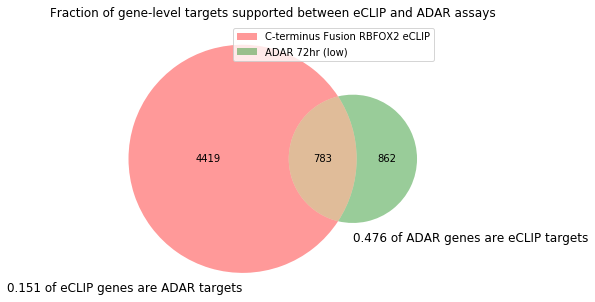

eclip gene count 5202
stamp gene count 1645


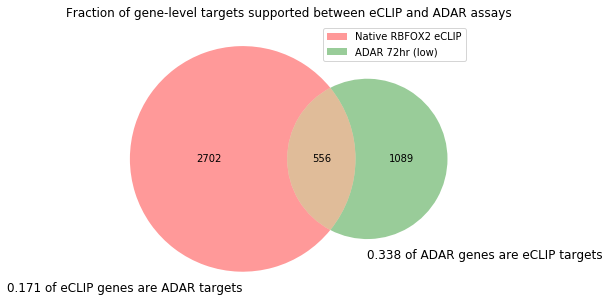

eclip gene count 3258
stamp gene count 1645


In [696]:
target_level(ADAR_72hr_low_R1_windows_merged, cterminus_eclip_df,
            stamp_label="ADAR 72hr (low)", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP",
             adar=True
            )

target_level(ADAR_72hr_low_R1_windows_merged, native_eclip_df,
            stamp_label="ADAR 72hr (low)", 
             eclip_label="Native RBFOX2 eCLIP",
             adar=True
            )

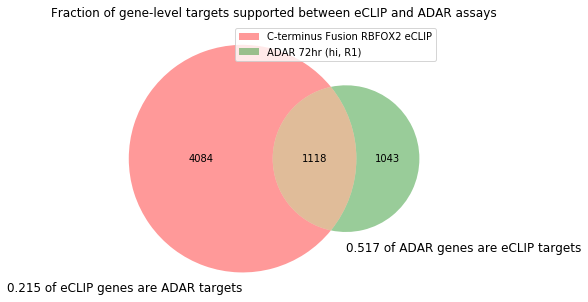

eclip gene count 5202
stamp gene count 2161


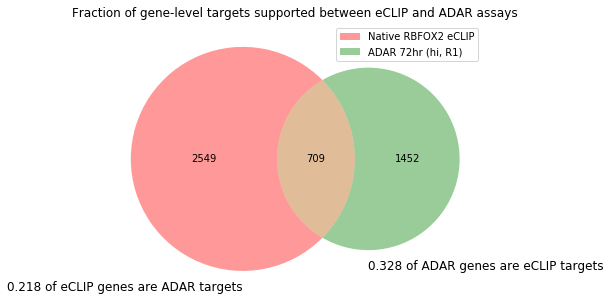

eclip gene count 3258
stamp gene count 2161


In [697]:
target_level(ADAR_72hr_hi_R1_windows_merged, cterminus_eclip_df,
            stamp_label="ADAR 72hr (hi, R1)", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP",
             adar=True
            )

target_level(ADAR_72hr_hi_R1_windows_merged, native_eclip_df,
            stamp_label="ADAR 72hr (hi, R1)", 
             eclip_label="Native RBFOX2 eCLIP",
             adar=True
            )

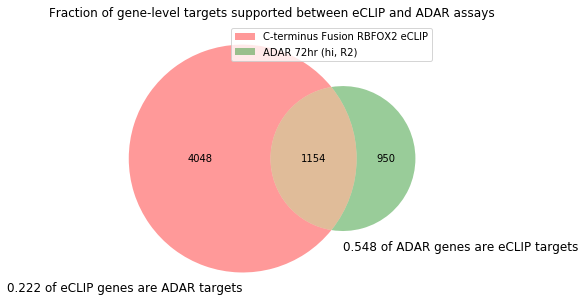

eclip gene count 5202
stamp gene count 2104


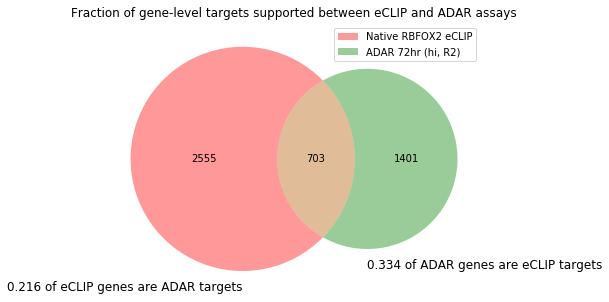

eclip gene count 3258
stamp gene count 2104


In [698]:
target_level(ADAR_72hr_hi_R2_windows_merged, cterminus_eclip_df,
            stamp_label="ADAR 72hr (hi, R2)", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP",
             adar=True
            )

target_level(ADAR_72hr_hi_R2_windows_merged, native_eclip_df,
            stamp_label="ADAR 72hr (hi, R2)", 
             eclip_label="Native RBFOX2 eCLIP",
             adar=True
            )

Control with RBFOX2 C Terminus eCLIP

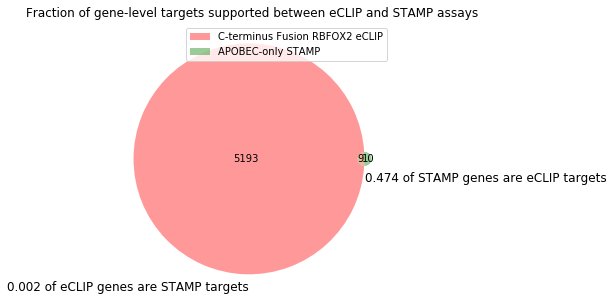

eclip gene count 5202
stamp gene count 19


In [699]:
target_level(control_windows_merged, cterminus_eclip_df,
            stamp_label="APOBEC-only STAMP", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP"
            )

Control with TIA C Terminus eCLIP

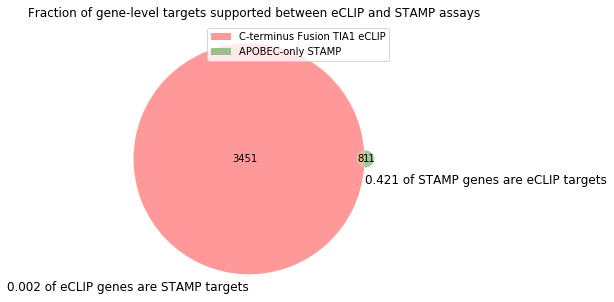

eclip gene count 3459
stamp gene count 19


In [700]:
target_level(control_windows_merged, tia1_eclip_df,
             stamp_label="APOBEC-only STAMP", 
             eclip_label="C-terminus Fusion TIA1 eCLIP"
            )

TIA sc aggregate with RBFOX2 C Terminus eCLIP

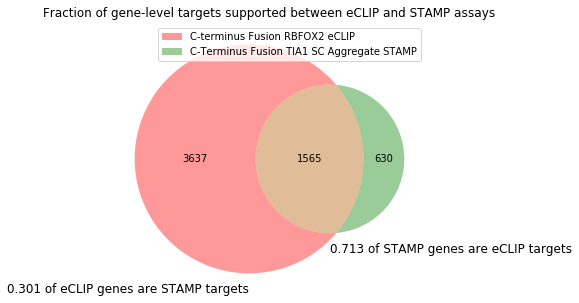

eclip gene count 5202
stamp gene count 2195


In [701]:
target_level(tia_sc_windows_merged, cterminus_eclip_df,
            stamp_label="C-Terminus Fusion TIA1 SC Aggregate STAMP", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP"
            )



RBFOX2 sc aggregate with TIA c Terminus eCLIP

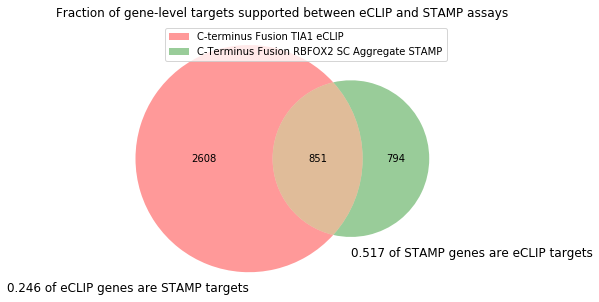

eclip gene count 3459
stamp gene count 1645


In [702]:
target_level(sc_windows_merged, tia1_eclip_df,
            stamp_label="C-Terminus Fusion RBFOX2 SC Aggregate STAMP", 
             eclip_label="C-terminus Fusion TIA1 eCLIP"
            )


TIA sc aggregate with TIA c Terminus eCLIP

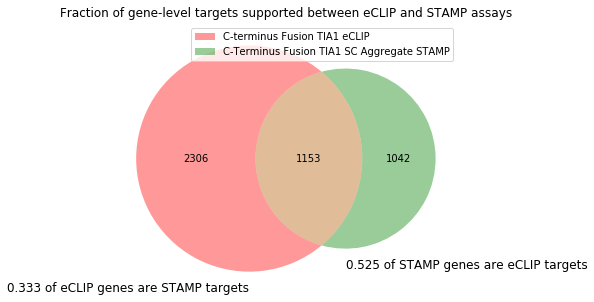

eclip gene count 3459
stamp gene count 2195


In [703]:
target_level(tia_sc_windows_merged, tia1_eclip_df,
             stamp_label="C-Terminus Fusion TIA1 SC Aggregate STAMP", 
             eclip_label="C-terminus Fusion TIA1 eCLIP"
            )

TIA bulk with TIA C terminus eCLIP

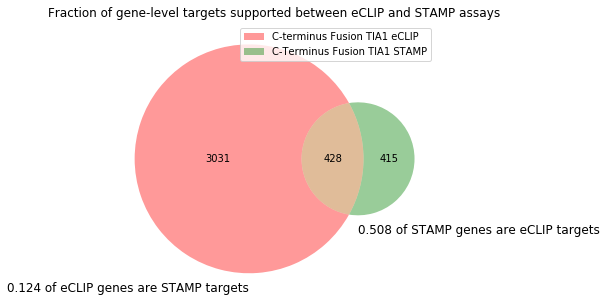

eclip gene count 3459
stamp gene count 843


In [704]:
target_level(tia_bulk_windows_merged, tia1_eclip_df,
             stamp_label="C-Terminus Fusion TIA1 STAMP", 
             eclip_label="C-terminus Fusion TIA1 eCLIP"
            )

RBFOX2 sc aggregate with C terminus eCLIP

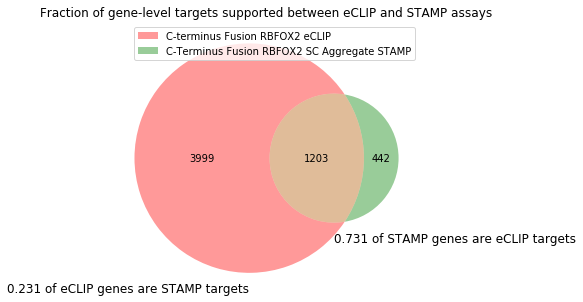

eclip gene count 5202
stamp gene count 1645


In [705]:
target_level(sc_windows_merged, cterminus_eclip_df, 
             stamp_label="C-Terminus Fusion RBFOX2 SC Aggregate STAMP", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP")


RBFOX2 sc aggregate with native eCLIP

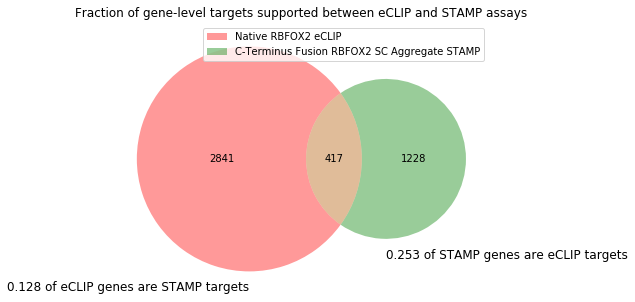

eclip gene count 3258
stamp gene count 1645


In [706]:
target_level(sc_windows_merged, native_eclip_df, stamp_label="C-Terminus Fusion RBFOX2 SC Aggregate STAMP",
            eclip_label="Native RBFOX2 eCLIP")


RBFOX2 C terminus STAMP with C Terminus eCLIP

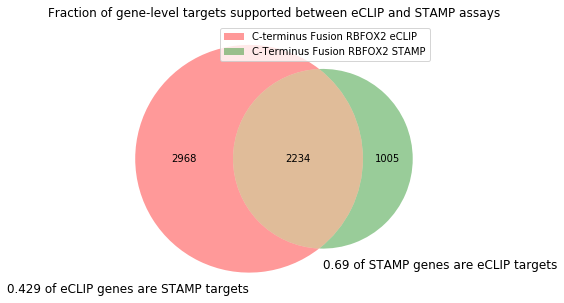

eclip gene count 5202
stamp gene count 3239


In [707]:
target_level(cwindows_merged, cterminus_eclip_df,
            stamp_label="C-Terminus Fusion RBFOX2 STAMP", 
             eclip_label="C-terminus Fusion RBFOX2 eCLIP")


RBFOX2 C terminus STAMP with native eCLIP

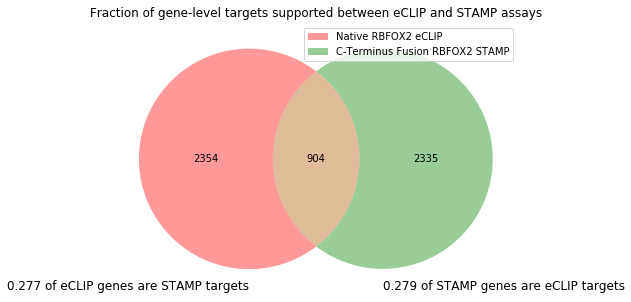

eclip gene count 3258
stamp gene count 3239


In [708]:
target_level(cwindows_merged, native_eclip_df, stamp_label="C-Terminus Fusion RBFOX2 STAMP",  
            eclip_label="Native RBFOX2 eCLIP")


RBFOX2 N termius STAMP with N Terminus eCLIP

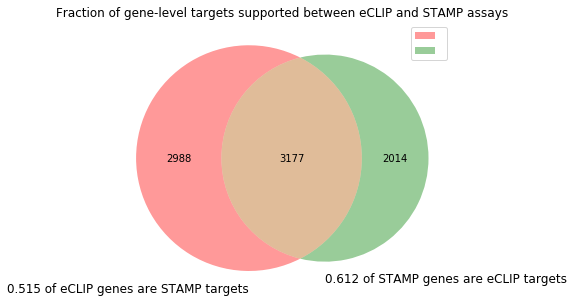

eclip gene count 6165
stamp gene count 5191


In [709]:
target_level(nwindows_merged, nterminus_eclip_df)


RBFOX2 N termius STAMP with native eCLIP

# Intersect with eCLIP

In [710]:
control_stamp_bedtool = pybedtools.BedTool.from_dataframe(control_windows_merged)

tia_sc_stamp_bedtool = pybedtools.BedTool.from_dataframe(tia_sc_windows_merged)
tia_bulk_stamp_bedtool = pybedtools.BedTool.from_dataframe(tia_bulk_windows_merged)
tia1_eclip_bedtool = pybedtools.BedTool.from_dataframe(tia1_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])


sc_stamp_bedtool = pybedtools.BedTool.from_dataframe(sc_windows_merged)
c_stamp_bedtool = pybedtools.BedTool.from_dataframe(cwindows_merged)

ADAR_72hr_low_R1_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_low_R1_windows_merged)
ADAR_72hr_hi_R1_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_hi_R1_windows_merged)
ADAR_72hr_hi_R2_stamp_bedtool = pybedtools.BedTool.from_dataframe(ADAR_72hr_hi_R2_windows_merged)

c_eclip_bedtool = pybedtools.BedTool.from_dataframe(cterminus_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])\
.slop(genome="hg19", b=eclip_padding)
n_stamp_bedtool = pybedtools.BedTool.from_dataframe(nwindows_merged)
n_eclip_bedtool = pybedtools.BedTool.from_dataframe(nterminus_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])\
.slop(genome="hg19", b=eclip_padding)

native_eclip_bedtool = pybedtools.BedTool.from_dataframe(native_eclip_df[['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand']])

ADAR 72hr low R1 with native eCLIP

In [711]:
ADAR_72hr_low_R1_native_eclip_intersection = ADAR_72hr_low_R1_stamp_bedtool.intersect(native_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_low_R1_native_eclip_intersection.index = ADAR_72hr_low_R1_native_eclip_intersection.id_stamp

num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites = len(ADAR_72hr_low_R1_native_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_low_R1_native_eclip_intersection[ADAR_72hr_low_R1_native_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_low_R1_native_eclip_intersection_stamp_sites))

3 2496
0.001201923076923077


ADAR 72hr low R1 with c-terminus eCLIP

In [712]:
ADAR_72hr_low_R1_c_eclip_intersection = ADAR_72hr_low_R1_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_low_R1_c_eclip_intersection.index = ADAR_72hr_low_R1_c_eclip_intersection.id_stamp

num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites = len(ADAR_72hr_low_R1_c_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_low_R1_c_eclip_intersection[ADAR_72hr_low_R1_c_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_low_R1_c_eclip_intersection_stamp_sites))

53 2496
0.02123397435897436


ADAR 72hr hi R1 with native eCLIP

In [713]:
ADAR_72hr_hi_R1_native_eclip_intersection = ADAR_72hr_hi_R1_stamp_bedtool.intersect(native_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_hi_R1_native_eclip_intersection.index = ADAR_72hr_hi_R1_native_eclip_intersection.id_stamp

num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites = len(ADAR_72hr_hi_R1_native_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_hi_R1_native_eclip_intersection[ADAR_72hr_hi_R1_native_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_hi_R1_native_eclip_intersection_stamp_sites))

13 3029
0.004291845493562232


ADAR 72hr hi R1 with c-terminus eCLIP

In [714]:
ADAR_72hr_hi_R1_c_eclip_intersection = ADAR_72hr_hi_R1_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_hi_R1_c_eclip_intersection.index = ADAR_72hr_hi_R1_c_eclip_intersection.id_stamp

num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites = len(ADAR_72hr_hi_R1_c_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_hi_R1_c_eclip_intersection[ADAR_72hr_hi_R1_c_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_hi_R1_c_eclip_intersection_stamp_sites))

380 3029
0.12545394519643446


ADAR 72hr hi R2 with native eCLIP

In [715]:
ADAR_72hr_hi_R2_native_eclip_intersection = ADAR_72hr_hi_R2_stamp_bedtool.intersect(native_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_hi_R2_native_eclip_intersection.index = ADAR_72hr_hi_R2_native_eclip_intersection.id_stamp

num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites = len(ADAR_72hr_hi_R2_native_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_hi_R2_native_eclip_intersection[ADAR_72hr_hi_R2_native_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_hi_R2_native_eclip_intersection_stamp_sites))

13 2971
0.0043756311006395154


ADAR 72hr hi R2 with c-terminus eCLIP

In [716]:
ADAR_72hr_hi_R2_c_eclip_intersection = ADAR_72hr_hi_R2_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
ADAR_72hr_hi_R2_c_eclip_intersection.index = ADAR_72hr_hi_R2_c_eclip_intersection.id_stamp

num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites = len(ADAR_72hr_hi_R2_c_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites_with_eclip_support = len(ADAR_72hr_hi_R2_c_eclip_intersection[ADAR_72hr_hi_R2_c_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites_with_eclip_support, num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites)
print(num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites_with_eclip_support/float(num_ADAR_72hr_hi_R2_c_eclip_intersection_stamp_sites))

433 2971
0.14574217435207001


TIA sc aggregate with RBFOX2 eCLIP

In [717]:
tia_sc_rbfox2_eclip_intersection = tia_sc_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
tia_sc_rbfox2_eclip_intersection.index = tia_sc_rbfox2_eclip_intersection.id_stamp

num_tia_sc_rbfox2_eclip_stamp_sites = len(tia_sc_rbfox2_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_tia_sc_rbfox2_eclip_stamp_sites_with_eclip_support = len(tia_sc_rbfox2_eclip_intersection[tia_sc_rbfox2_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_tia_sc_rbfox2_eclip_stamp_sites_with_eclip_support, num_tia_sc_rbfox2_eclip_stamp_sites)
print(num_tia_sc_rbfox2_eclip_stamp_sites_with_eclip_support/float(num_tia_sc_rbfox2_eclip_stamp_sites))

1125 2594
0.4336931380107941


In [718]:
tia_sc_rbfox2_eclip_genes_for_sites_with_eclip_support = set(tia_sc_rbfox2_eclip_intersection[tia_sc_rbfox2_eclip_intersection.chrom_eclip != '.'].id2_stamp)
tia_sc_rbfox2_eclip_genes_for_sites_without_eclip_support = set(tia_sc_rbfox2_eclip_intersection[tia_sc_rbfox2_eclip_intersection.chrom_eclip == '.'].id2_stamp)

In [719]:
len(set(tia_sc_rbfox2_eclip_intersection.id2_stamp))

2196

RBFOX2 sc aggregate with TIA eCLIP

In [720]:
rbfox2_sc_tia_eclip_intersection = sc_stamp_bedtool.intersect(tia1_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
rbfox2_sc_tia_eclip_intersection.index = rbfox2_sc_tia_eclip_intersection.id_stamp

num_rbfox2_sc_tia_eclip_stamp_sites = len(rbfox2_sc_tia_eclip_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_rbfox2_sc_tia_eclip_stamp_sites_with_eclip_support = len(rbfox2_sc_tia_eclip_intersection[rbfox2_sc_tia_eclip_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_rbfox2_sc_tia_eclip_stamp_sites_with_eclip_support, num_rbfox2_sc_tia_eclip_stamp_sites)
print(num_rbfox2_sc_tia_eclip_stamp_sites_with_eclip_support/float(num_rbfox2_sc_tia_eclip_stamp_sites))

252 1903
0.13242249080399368


In [721]:
genes_covered_by_stamp = set(rbfox2_sc_tia_eclip_intersection.id2_stamp)

In [722]:
genes_covered_by_eclip = set(tia1_eclip_df.geneid)

In [723]:
len(genes_covered_by_stamp.intersection(genes_covered_by_eclip))/len(genes_covered_by_eclip)

0.24343813094894723

TIA sc aggregate 

In [724]:
tia_sc_intersection = tia_sc_stamp_bedtool.intersect(tia1_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
tia_sc_intersection.index = tia_sc_intersection.id_stamp

num_tia_sc_stamp_sites = len(tia_sc_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_tia_sc_stamp_sites_with_eclip_support = len(tia_sc_intersection[tia_sc_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_tia_sc_stamp_sites_with_eclip_support, num_tia_sc_stamp_sites)
print(num_tia_sc_stamp_sites_with_eclip_support/float(num_tia_sc_stamp_sites))

327 2594
0.12606013878180417


TIA bulk aggregate

In [725]:
tia_bulk_stamp_bedtool.to_dataframe()

,chrom,start,end,name,score,strand
0,chr1,14512,14522,"chr1:14512-14513,chr1:14521-14522",ENSG00000227232.4,-
1,chr1,18564,18643,"chr1:18564-18565,chr1:18642-18643",ENSG00000227232.4,-
2,chr1,565352,565375,"chr1:565352-565353,chr1:565374-565375",ENSG00000225630.1,+
3,chr1,1327983,1327991,"chr1:1327983-1327984,chr1:1327990-1327991",ENSG00000221978.7,-
4,chr1,6324487,6324490,"chr1:6324487-6324488,chr1:6324489-6324490",ENSG00000097021.15,-
...,...,...,...,...,...,...
887,chrX,135951710,135951765,"chrX:135951710-135951711,chrX:135951764-135951765",ENSG00000147274.10,-
888,chrX,151934947,151934950,"chrX:151934947-151934948,chrX:151934949-151934950",ENSG00000221867.4,-
889,chrX,153627064,153627076,"chrX:153627064-153627065,chrX:153627075-153627076",ENSG00000147403.12,+
890,chrX,154045301,154045327,"chrX:154045301-154045302,chrX:154045326-154045327",ENSG00000130830.10,-


In [726]:
tia_bulk_intersection = tia_bulk_stamp_bedtool.intersect(tia1_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
tia_bulk_intersection.index = tia_bulk_intersection.id_stamp

num_tia_bulk_stamp_sites = len(tia_bulk_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_tia_bulk_stamp_sites_with_eclip_support = len(tia_bulk_intersection[tia_bulk_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_tia_bulk_stamp_sites_with_eclip_support, num_tia_bulk_stamp_sites)
print(num_tia_bulk_stamp_sites_with_eclip_support/float(num_tia_bulk_stamp_sites))

62 892
0.06950672645739911


SC-aggregate STAMP with c-terminus eCLIP

In [727]:
sc_intersection = sc_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
sc_intersection.index = sc_intersection.id_stamp

num_sc_stamp_sites = len(sc_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_sc_stamp_sites_with_eclip_support = len(sc_intersection[sc_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_sc_stamp_sites_with_eclip_support, num_sc_stamp_sites)
print(num_sc_stamp_sites_with_eclip_support/float(num_sc_stamp_sites))

976 1903
0.512874408828166


SC-aggregate STAMP with native eCLIP

In [728]:
sc_native_intersection = sc_stamp_bedtool.intersect(native_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
sc_native_intersection.index = sc_native_intersection.id_stamp

C-terminus STAMP with native eCLIP

In [729]:
native_intersection = c_stamp_bedtool.intersect(native_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])
native_intersection.index = native_intersection.id_stamp
num_native_stamp_sites = len(native_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_native_stamp_sites_with_eclip_support = len(native_intersection[native_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

print(num_native_stamp_sites_with_eclip_support, num_native_stamp_sites)

68 5044


In [730]:
print(num_native_stamp_sites_with_eclip_support/num_native_stamp_sites)

0.013481363996827915


C-terminus IDR 27 and 28 STAMP with C-terminus eCLIP

In [731]:
c_idr_27_and_28_intersection = rbfox2_unfiltered_idr_peaks_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])

In [732]:
num_cstamp_idr_sites = len(c_idr_27_and_28_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_cstamp_idr_sites_with_eclip_support = len(c_idr_27_and_28_intersection[c_idr_27_and_28_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

In [733]:
print(num_cstamp_idr_sites_with_eclip_support, num_cstamp_idr_sites)

2152 3985


C-terminus STAMP with C-terminus eCLIP

In [734]:
c_intersection = c_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])

In [735]:
c_intersection.index = c_intersection.id_stamp

In [736]:
num_cstamp_sites = len(c_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_cstamp_sites_with_eclip_support = len(c_intersection[c_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

In [737]:
print(num_cstamp_sites_with_eclip_support, num_cstamp_sites)

2379 5044


In [738]:
# Fraction of C STAMP sites with eCLIP support
num_cstamp_sites_with_eclip_support/float(num_cstamp_sites)

0.47164948453608246

In [739]:
c_intersection_control_stamp = control_stamp_bedtool.intersect(c_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])

In [740]:
num_control_stamp_sites = len(c_intersection_control_stamp.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_control_stamp_sites_with_ceclip_support = len(c_intersection_control_stamp[c_intersection_control_stamp.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))


In [741]:
num_control_stamp_sites_with_ceclip_support

3

In [742]:
# Fraction of control STAMP sites with C-terminus eCLIP support

num_control_stamp_sites_with_ceclip_support/float(num_control_stamp_sites)

0.14285714285714285

In [743]:
n_intersection = n_stamp_bedtool.intersect(n_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])

In [744]:
num_nstamp_sites = len(n_intersection.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_nstamp_sites_with_eclip_support = len(n_intersection[n_intersection.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

In [745]:
print(num_nstamp_sites, num_nstamp_sites_with_eclip_support)

8370 2438


In [746]:
# Fraction of N STAMP sites with eCLIP support
num_nstamp_sites_with_eclip_support/float(num_nstamp_sites)

0.2912783751493429

In [747]:
n_intersection_control_stamp = control_stamp_bedtool.intersect(n_eclip_bedtool, loj=True, wa=True, wb=True, s=True).to_dataframe(names=['chrom_stamp', 'start_stamp', 'end_stamp', 'id_stamp', 'id2_stamp', 'strand_stamp',
                                                                                                   'chrom_eclip', 'start_eclip', 'end_eclip', 'l2fc_eclip', 'l10p_eclip', 'strand_eclip'
                                                                                                  ])

In [748]:
num_control_stamp_sites = len(n_intersection_control_stamp.drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))
num_control_stamp_sites_with_neclip_support = len(n_intersection_control_stamp[n_intersection_control_stamp.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp']))

In [749]:
# Fraction of control STAMP sites with N-terminus eCLIP support

num_control_stamp_sites_with_neclip_support/float(num_control_stamp_sites)

0.047619047619047616

# Add motif

In [750]:
from pyfaidx import Fasta
HG19_REF = '/projects/ps-yeolab3/bay001/annotations/hg19/hg19.fa'
FA = Fasta(HG19_REF, rebuild=False)
import re

def add_sequence(r, dist_from_site=200):
    #print('sequence!!!')
    chrom = r.chrom_stamp
    start = int(r.start_stamp)# + 25 - dist_from_site)
    end = int(r.end_stamp)# -25 + dist_from_site)
    strand = r.strand_stamp
        
    try:
        sequence = FA[chrom][start:end].seq
    except:
        if chrom == 'chrMT':
            sequence = FA['chrM'][start:end].seq
    
    r['sequence'] = sequence
    r['rc_sequence'] = get_reverse_complement(sequence)
    return r

def get_reverse_complement(sequence):
    """Return the reverse complement strand of a given sequence"""
    mapper = {
        'A': 'T',
        'T': 'A',
        'C': 'G',
        'G': 'C',
        'a': 't',
        't': 'a',
        'c': 'g',
        'g': 'c'
    }
    reverse_complement = ''
    for s in sequence:
        reverse_complement = '{}{}'.format(mapper.get(s), reverse_complement)
    return reverse_complement

def make_regex_from_string(motif):
    motif = motif.replace('**', '(\w){2}')
    motif = motif.replace('*', '\w')
    
    p = re.compile(motif)
    return p

def check_sequence_for_motif(sequence, motif):
    sequence = sequence.upper()
    p = make_regex_from_string(motif) 
    match = p.findall(sequence) 
    return len(match) > 0

def check_region_for_motifs(r, motifs):
    """
    Return whether or not the given motifs are present in the given sequence.
        * If strand is positive, look for the given motifs in the sequence.
        * If strand is negative, look for the reverse complement of the given motifs 
          in the reverse complement of the given sequence
    """
    chrom = r.chrom_stamp
    strand = r.strand_stamp
    sequence = r.sequence
    reverse_complement_sequence = r.rc_sequence

    for motif in motifs:
        if strand == '+':
            motif_present = check_sequence_for_motif(sequence, motif)
            
        elif strand == '-':
            motif_present = check_sequence_for_motif(reverse_complement_sequence,
                                                     get_reverse_complement(motif))
        else:
            motif_present = False
            sys.exit("\tUh oh, strand is missing (neither + nor -)... Exiting\n")
            
        r['{}'.format(motif)] = 1 if motif_present else 0

    return r

def add_sequence_to_df(df):
    df = df.apply(add_sequence, axis=1)
    df = df.apply(check_region_for_motifs, args=[['GCATG', 'TTTT', 'CTTTAT']], axis=1)
    return df

In [751]:
from multiprocessing import Pool
import numpy as np

# FIXME: See update below
def index_marks(nrows, chunk_size):
    return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)

def split(dfm, chunk_size):
    indices = index_marks(dfm.shape[0], chunk_size)
    return np.split(dfm, indices)

def add_sequence_info(df):
    # Set up a multi-processing pool to process each shard individually and add feature columns
    num_processes = 8
    p = Pool(num_processes)

    #chunks = split(stamp_eclip_intersection.head(100), 100)
    chunks = split(df, 10000)

    results = p.map(add_sequence_to_df, chunks)
    p.close()
    p.join()
    return pd.concat(results)

In [752]:
tia_bulk_intersection_with_sequence = add_sequence_info(tia_bulk_intersection)

In [1087]:
ADAR_72hr_hi_R2_native_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_hi_R2_native_eclip_intersection)

In [1088]:
ADAR_72hr_hi_R2_c_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_hi_R2_c_eclip_intersection)

In [1089]:
ADAR_72hr_hi_R1_c_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_hi_R1_c_eclip_intersection)

In [1090]:
ADAR_72hr_hi_R1_native_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_hi_R1_native_eclip_intersection)

In [1091]:
ADAR_72hr_low_R1_c_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_low_R1_c_eclip_intersection)

In [1092]:
ADAR_72hr_low_R1_native_eclip_intersection_with_sequence = add_sequence_info(ADAR_72hr_low_R1_native_eclip_intersection)

In [1093]:
native_intersection_with_sequence = add_sequence_info(native_intersection)

In [1094]:
sc_native_intersection_with_sequence = add_sequence_info(sc_native_intersection)

In [1095]:
sc_intersection_with_sequence = add_sequence_info(sc_intersection)

In [60]:
c_idr_27_and_28_intersection_with_sequence = add_sequence_info(c_idr_27_and_28_intersection)

In [1096]:
c_intersection_with_sequence = add_sequence_info(c_intersection)

In [1097]:
n_intersection_with_sequence = add_sequence_info(n_intersection)

In [1098]:
c_intersection_control_stamp_with_sequence = add_sequence_info(c_intersection_control_stamp)

In [1099]:
#n_intersection_control_stamp_with_sequence = add_sequence_info(n_intersection_control_stamp)

In [1100]:
def stamp_index(r):
    return '{}:{}-{}'.format(r.chrom_stamp, r.start_stamp, r.end_stamp)

c_intersection_control_stamp_with_sequence.index = c_intersection_control_stamp_with_sequence.apply(stamp_index, axis=1)

In [1101]:
#n_intersection_control_stamp_with_sequence.index = n_intersection_control_stamp_with_sequence.apply(stamp_index, axis=1)

In [1102]:
len(c_intersection_control_stamp_with_sequence[c_intersection_control_stamp_with_sequence.chrom_eclip != '.'].index)

12

In [1103]:
#n_intersection_control_stamp_with_sequence.loc[c_intersection_control_stamp_with_sequence[c_intersection_control_stamp_with_sequence.chrom_eclip != '.'].index]

#### output some files for edit-c ranking...

# Venn diagrams!

### By merged window 

In [753]:
import matplotlib.pyplot as plt
    
l10p_threshold = 3
l2fc_threshold = 2

def make_pie(df, title, motif='GCATG'):
    overlapping_eclip = df[df.chrom_eclip != '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp'])
    print('overlapping eclip: ', len(overlapping_eclip))
    
    not_overlapping_eclip = df[df.chrom_eclip == '.'].drop_duplicates(['chrom_stamp', 'start_stamp', 'end_stamp'])
    print('not overlapping eclip: ', len(not_overlapping_eclip))

    overlapping_eclip_with_motif = overlapping_eclip[overlapping_eclip[motif] == 1]
    print('overlapping_eclip_with_motif:', len(overlapping_eclip_with_motif))
    overlapping_eclip_without_motif = overlapping_eclip[overlapping_eclip[motif] == 0]
    print('overlapping_eclip_without_motif:', len(overlapping_eclip_without_motif))

    not_overlapping_eclip_with_motif = not_overlapping_eclip[not_overlapping_eclip[motif] == 1]
    print('not_overlapping_eclip_with_motif:', len(not_overlapping_eclip_with_motif))
    not_overlapping_eclip_without_motif = not_overlapping_eclip[not_overlapping_eclip[motif] == 0]
    print('not_overlapping_eclip_without_motif:', len(not_overlapping_eclip_without_motif))


    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Yes eCLIP, motif present', 'Yes eCLIP, motif absent','No eCLIP, motif present', 'No eCLIP, motif absent'
    
    
    sizes = [len(overlapping_eclip_with_motif),
             len(overlapping_eclip_without_motif),
             len(not_overlapping_eclip_with_motif),
             len(not_overlapping_eclip_without_motif)]

    plt.figure(figsize=(6,6))
    patches, texts, percents = plt.pie(sizes, autopct='%1.1f%%', startangle=30, pctdistance=1.08)

    plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title(title)
    plt.savefig('svgs/pie_{}.svg'.format(title.replace(' ', '_')))

    plt.show()
    
    #return overlapping_eclip_with_motif,overlapping_eclip_without_motif,not_overlapping_eclip_with_motif,not_overlapping_eclip_without_motif

overlapping eclip:  62
not overlapping eclip:  830
overlapping_eclip_with_motif: 24
overlapping_eclip_without_motif: 38
not_overlapping_eclip_with_motif: 230
not_overlapping_eclip_without_motif: 600


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


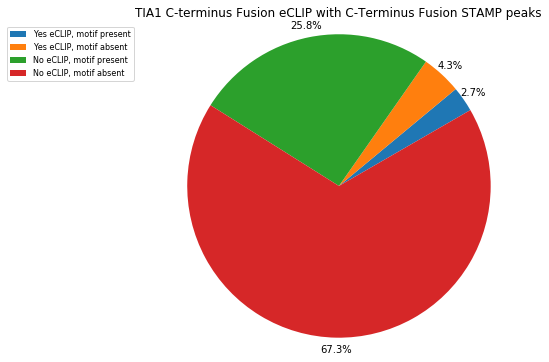

In [754]:
make_pie(tia_bulk_intersection_with_sequence, 'TIA1 C-terminus Fusion eCLIP with C-Terminus Fusion STAMP peaks', motif='TTTT')

('overlapping eclip: ', 1582)
('not overlapping eclip: ', 2403)
('overlapping_eclip_with_motif:', 402)
('overlapping_eclip_without_motif:', 1180)
('not_overlapping_eclip_with_motif:', 244)
('not_overlapping_eclip_without_motif:', 2159)


/projects/ps-yeolab4/software/eclipconda/envs/python2essential-0.0.1/lib/python2.7/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "left center". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


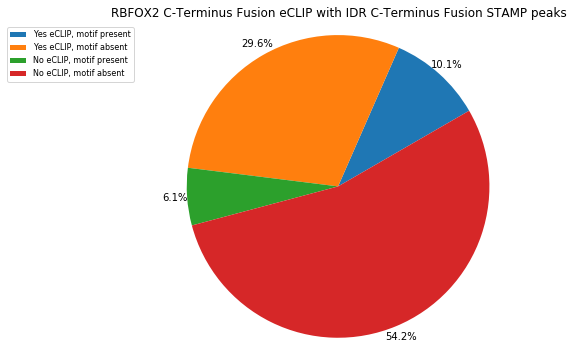

In [62]:
make_pie(c_idr_27_and_28_intersection_with_sequence, 'RBFOX2 C-Terminus Fusion eCLIP with IDR C-Terminus Fusion STAMP peaks')

overlapping eclip:  433
not overlapping eclip:  2538
overlapping_eclip_with_motif: 70
overlapping_eclip_without_motif: 363
not_overlapping_eclip_with_motif: 449
not_overlapping_eclip_without_motif: 2089


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


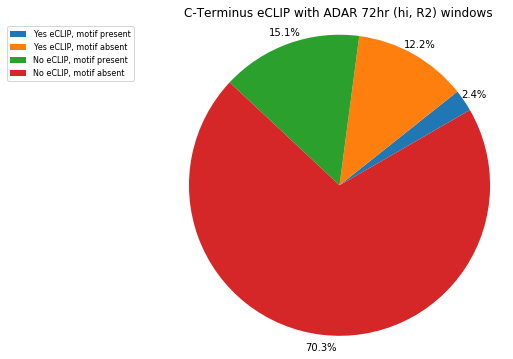

In [1105]:
make_pie(ADAR_72hr_hi_R2_c_eclip_intersection_with_sequence, 'C-Terminus eCLIP with ADAR 72hr (hi, R2) windows')

overlapping eclip:  13
not overlapping eclip:  2958
overlapping_eclip_with_motif: 4
overlapping_eclip_without_motif: 9
not_overlapping_eclip_with_motif: 515
not_overlapping_eclip_without_motif: 2443


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


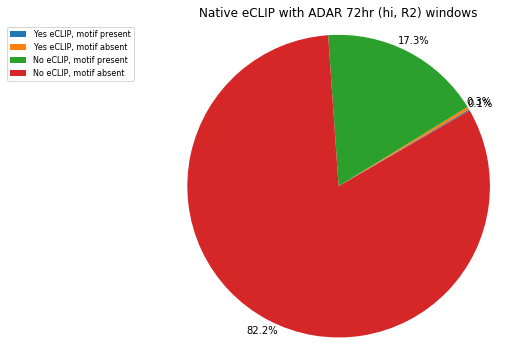

In [1106]:
make_pie(ADAR_72hr_hi_R2_native_eclip_intersection_with_sequence, 'Native eCLIP with ADAR 72hr (hi, R2) windows')

overlapping eclip:  380
not overlapping eclip:  2649
overlapping_eclip_with_motif: 61
overlapping_eclip_without_motif: 319
not_overlapping_eclip_with_motif: 497
not_overlapping_eclip_without_motif: 2152


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


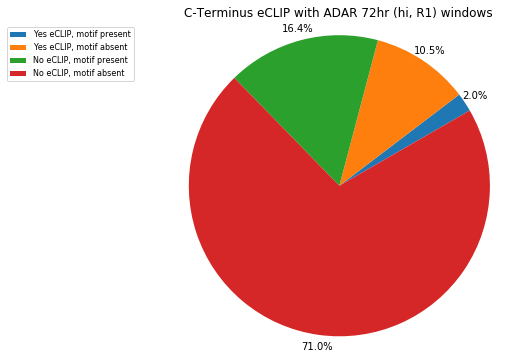

In [1107]:
make_pie(ADAR_72hr_hi_R1_c_eclip_intersection_with_sequence, 'C-Terminus eCLIP with ADAR 72hr (hi, R1) windows')

overlapping eclip:  13
not overlapping eclip:  3016
overlapping_eclip_with_motif: 4
overlapping_eclip_without_motif: 9
not_overlapping_eclip_with_motif: 554
not_overlapping_eclip_without_motif: 2462


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


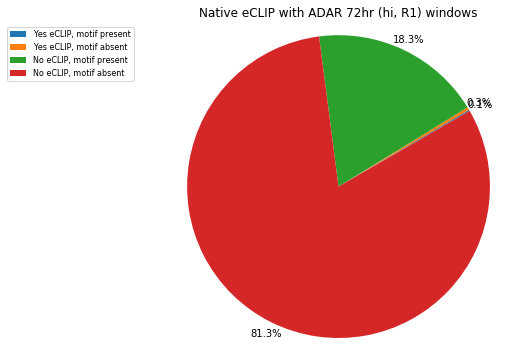

In [1108]:
make_pie(ADAR_72hr_hi_R1_native_eclip_intersection_with_sequence, 'Native eCLIP with ADAR 72hr (hi, R1) windows')

overlapping eclip:  53
not overlapping eclip:  2443
overlapping_eclip_with_motif: 14
overlapping_eclip_without_motif: 39
not_overlapping_eclip_with_motif: 448
not_overlapping_eclip_without_motif: 1995


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


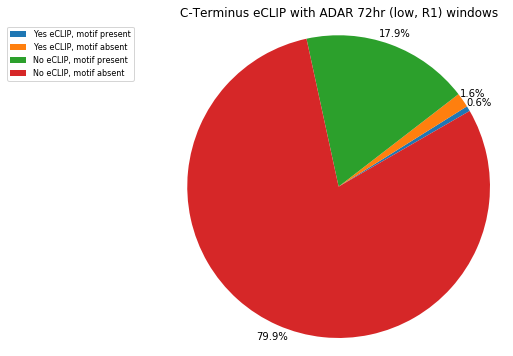

In [1109]:
make_pie(ADAR_72hr_low_R1_c_eclip_intersection_with_sequence, 'C-Terminus eCLIP with ADAR 72hr (low, R1) windows')

overlapping eclip:  3
not overlapping eclip:  2493
overlapping_eclip_with_motif: 2
overlapping_eclip_without_motif: 1
not_overlapping_eclip_with_motif: 460
not_overlapping_eclip_without_motif: 2033


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


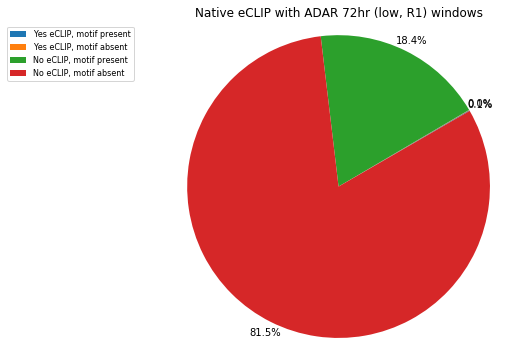

In [1110]:
make_pie(ADAR_72hr_low_R1_native_eclip_intersection_with_sequence, 'Native eCLIP with ADAR 72hr (low, R1) windows')

overlapping eclip:  68
not overlapping eclip:  4976
overlapping_eclip_with_motif: 37
overlapping_eclip_without_motif: 31
not_overlapping_eclip_with_motif: 912
not_overlapping_eclip_without_motif: 4064


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


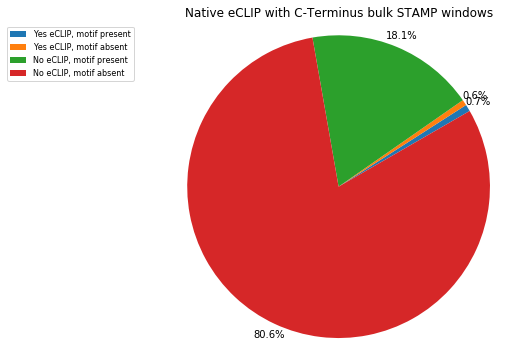

In [1111]:
make_pie(native_intersection_with_sequence, "Native eCLIP with C-Terminus bulk STAMP windows")

overlapping eclip:  2379
not overlapping eclip:  2665
overlapping_eclip_with_motif: 542
overlapping_eclip_without_motif: 1837
not_overlapping_eclip_with_motif: 407
not_overlapping_eclip_without_motif: 2258


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


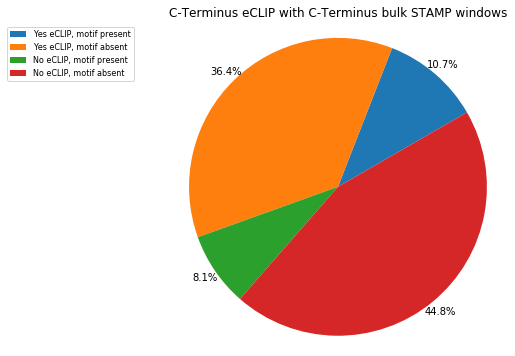

In [1112]:
make_pie(c_intersection_with_sequence, 'C-Terminus eCLIP with C-Terminus bulk STAMP windows')

In [1113]:
len(set(c_intersection_with_sequence.id2_stamp))

3241

In [1114]:
# Output red sitesto red_zones
c_intersection_with_sequence[(c_intersection_with_sequence.chrom_eclip == '.') & (c_intersection_with_sequence.GCATG == 0)].to_csv('red_zones/c_eclip_c_stamp_red_regions.tsv', 
                                                                                                                                  sep='\t',
                                                                                                                                  header=True,
                                                                                                                                  index=True)

In [1115]:
genes_on_nonsupported_sites = set(c_intersection_with_sequence[(c_intersection_with_sequence.chrom_eclip == '.') & (c_intersection_with_sequence.GCATG == 0)].id2_stamp)

In [1116]:
len(genes_on_nonsupported_sites)

1828

In [1117]:
genes_on_sites_with_eclip_support = set(c_intersection_with_sequence[(c_intersection_with_sequence.chrom_eclip != '.')].id2_stamp)

In [1118]:
genes_on_sites_with_motif = set(c_intersection_with_sequence[c_intersection_with_sequence.GCATG == 1].id2_stamp)

In [1119]:
genes_on_supported_sites = genes_on_sites_with_eclip_support.union(genes_on_sites_with_motif)

In [1120]:
len(genes_on_supported_sites)

1888

In [1121]:
genes_on_non_supported_sites_not_present_on_supported_sites = genes_on_nonsupported_sites.difference(genes_on_supported_sites)

In [1122]:
len(genes_on_non_supported_sites_not_present_on_supported_sites)

1353

overlapping eclip:  3
not overlapping eclip:  18
overlapping_eclip_with_motif: 0
overlapping_eclip_without_motif: 3
not_overlapping_eclip_with_motif: 1
not_overlapping_eclip_without_motif: 17


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


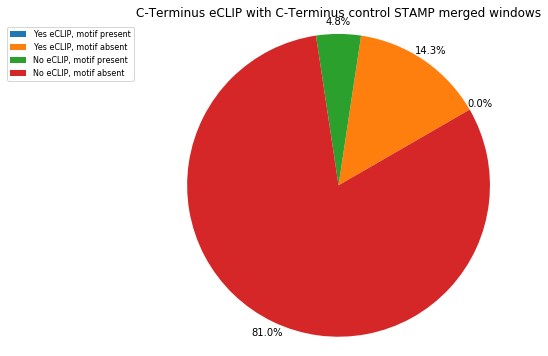

In [1123]:
make_pie(c_intersection_control_stamp_with_sequence, 'C-Terminus eCLIP with C-Terminus control STAMP merged windows')

Aggregate SC 

overlapping eclip:  976
not overlapping eclip:  927
overlapping_eclip_with_motif: 192
overlapping_eclip_without_motif: 784
not_overlapping_eclip_with_motif: 112
not_overlapping_eclip_without_motif: 815


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


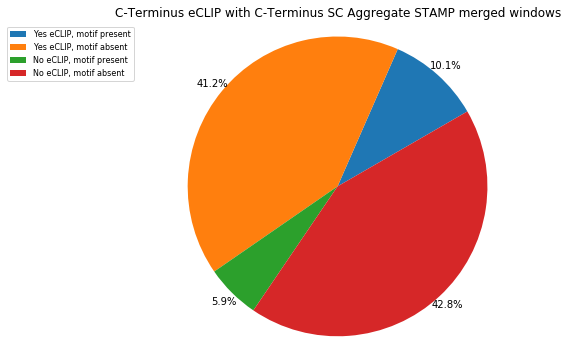

In [1124]:
make_pie(sc_intersection_with_sequence, 'C-Terminus eCLIP with C-Terminus SC Aggregate STAMP merged windows')

In [1125]:
# Output red sitesto red_zones
sc_intersection_with_sequence[(sc_intersection_with_sequence.chrom_eclip == '.') & (sc_intersection_with_sequence.GCATG == 0)].to_csv('red_zones/c_eclip_sc_agg_stamp_red_regions.tsv', 
                                                                                                                                  sep='\t',
                                                                                                                                  header=True,
                                                                                                                                  index=True)

overlapping eclip:  21
not overlapping eclip:  1882
overlapping_eclip_with_motif: 11
overlapping_eclip_without_motif: 10
not_overlapping_eclip_with_motif: 293
not_overlapping_eclip_without_motif: 1589


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


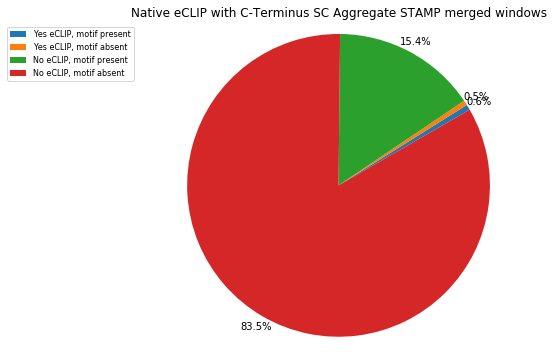

In [1126]:
make_pie(sc_native_intersection_with_sequence, 'Native eCLIP with C-Terminus SC Aggregate STAMP merged windows')

## By gene

In [1127]:
l10p_threshold = 3
l2fc_threshold = 2

def make_pie_genes(df, title, motif='GCATG'):
    overlapping_eclip = df[df.chrom_eclip != '.']
    #print('overlapping eclip: ', len(overlapping_eclip))
    not_overlapping_eclip = df[df.chrom_eclip == '.']
    #print('not overlapping eclip: ', len(not_overlapping_eclip))

    #print('')
    overlapping_eclip_with_motif = overlapping_eclip[overlapping_eclip[motif] == 1]
    #print('overlapping_eclip_with_motif:', len(overlapping_eclip_with_motif))
    overlapping_eclip_without_motif = overlapping_eclip[overlapping_eclip[motif] == 0]
    #print('overlapping_eclip_without_motif:', len(overlapping_eclip_without_motif))

    not_overlapping_eclip_with_motif = not_overlapping_eclip[not_overlapping_eclip[motif] == 1]
    #print('not_overlapping_eclip_with_motif:', len(not_overlapping_eclip_with_motif))
    not_overlapping_eclip_without_motif = not_overlapping_eclip[not_overlapping_eclip[motif] == 0]
    #print('not_overlapping_eclip_without_motif:', len(not_overlapping_eclip_without_motif))
    
    #print('')
    total_genes = df.id2_stamp.unique()
    #print('total genes', len(total_genes))
    genes_overlapping_eclip = overlapping_eclip.id2_stamp.unique()
    genes_not_overlapping_eclip = [g for g in not_overlapping_eclip.id2_stamp.unique() if g not in genes_overlapping_eclip]
    #print('genes overlapping eclip', len(genes_overlapping_eclip))
    #print('genes not overlapping eclip', len(genes_not_overlapping_eclip))
              
    genes_with_stamp_sites_overlapping_eclip_and_motif = set(overlapping_eclip_with_motif.id2_stamp.unique())
    
    genes_with_stamp_sites_overlapping_eclip_without_motif = set([g for g in overlapping_eclip_without_motif.id2_stamp.unique() if g not in \
                                                              list(genes_with_stamp_sites_overlapping_eclip_and_motif)
                                                        ])
    
    
    genes_not_overlapping_eclip_but_with_motif = set([g for g in not_overlapping_eclip_with_motif.id2_stamp.unique() if g not in \
                                                      list(genes_overlapping_eclip) +\
                                                      list(genes_with_stamp_sites_overlapping_eclip_and_motif) +\
                                                      list(genes_with_stamp_sites_overlapping_eclip_without_motif)
                                                     ])

    genes_not_overlapping_eclip_or_motif = set([g for g in set(not_overlapping_eclip_without_motif.id2_stamp.unique()) if g not in\
                                        list(genes_not_overlapping_eclip_but_with_motif) +\
                                                list(genes_with_stamp_sites_overlapping_eclip_and_motif) +\
                                                list(genes_with_stamp_sites_overlapping_eclip_without_motif)
                                               ])
    
    """
    print('')
    print('genes_with_stamp_sites_overlapping_eclip_and_motif:', len(genes_with_stamp_sites_overlapping_eclip_and_motif))
    print('genes_with_stamp_sites_overlapping_eclip_without_motif', len(genes_with_stamp_sites_overlapping_eclip_without_motif))
    print('genes_not_overlapping_eclip_but_with_motif', len(genes_not_overlapping_eclip_but_with_motif))
    print('genes_not_overlapping_eclip_or_motif', len(genes_not_overlapping_eclip_or_motif))
    """
    
    labels = 'Yes eCLIP, motif present', 'Yes eCLIP, motif absent','No eCLIP, motif present', 'No eCLIP, motif absent'
    sizes = len(genes_with_stamp_sites_overlapping_eclip_and_motif), len(genes_with_stamp_sites_overlapping_eclip_without_motif),\
    len(genes_not_overlapping_eclip_but_with_motif), len(genes_not_overlapping_eclip_or_motif)

    plt.figure(figsize=(6,6))
    patches, texts, percents = plt.pie(sizes, autopct='%1.1f%%', startangle=30, pctdistance=1.05)

    plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('{} (total genes: {})'.format(title, len(total_genes)))
    plt.savefig('svgs/pie_gene_{}.svg'.format(title.replace(' ', '_')))

    plt.show()
    
    return genes_with_stamp_sites_overlapping_eclip_and_motif, genes_with_stamp_sites_overlapping_eclip_without_motif,\
    genes_not_overlapping_eclip_but_with_motif,genes_not_overlapping_eclip_or_motif


In [1128]:
genes_at_sites_with_eclip = set(tia_sc_intersection_with_sequence[tia_sc_intersection_with_sequence.chrom_eclip != '.'].id2_stamp)

NameError: name 'tia_sc_intersection_with_sequence' is not defined

In [ ]:
genes_at_sites_without_eclip = set(tia_sc_intersection_with_sequence[tia_sc_intersection_with_sequence.chrom_eclip == '.'].id2_stamp)

In [ ]:
len(genes_at_sites_with_eclip.union(genes_at_sites_without_eclip))

In [ ]:
len(genes_at_sites_with_eclip)

In [ ]:
len(genes_at_sites_without_eclip.difference(genes_at_sites_with_eclip))

In [ ]:
make_pie_genes(tia_sc_intersection_with_sequence, 'C Terminus TIA1 eCLIP with SC Aggregate TIA1 Merged Windows - gene level', motif='CTTTAT')

In [ ]:
n_n_genes_with_stamp_sites_overlapping_eclip_and_motif, n_n_genes_with_stamp_sites_overlapping_eclip_without_motif,\
    n_n_genes_not_overlapping_eclip_but_with_motif,n_n_genes_not_overlapping_eclip_or_motif = make_pie_genes(n_intersection_with_sequence, 'N Terminus eCLIP with N Terminus Merged Windows - gene level')


In [ ]:
len(n_n_genes_not_overlapping_eclip_or_motif)

In [ ]:
#pd.DataFrame(list(n_n_genes_not_overlapping_eclip_or_motif), columns=['ensg_id']).to_csv("N-TerminalComparisonRedGenes.tsv", sep="\t")

In [ ]:
genes_with_stamp_sites_overlapping_eclip_and_motif, genes_with_stamp_sites_overlapping_eclip_without_motif,\
    genes_not_overlapping_eclip_but_with_motif,genes_not_overlapping_eclip_or_motif = make_pie_genes(n_intersection_control_stamp_with_sequence, 'N Terminus eCLIP with control merged windows - gene level')

In [ ]:
c_c_genes_with_stamp_sites_overlapping_eclip_and_motif, c_c_genes_with_stamp_sites_overlapping_eclip_without_motif,\
    c_c_genes_not_overlapping_eclip_but_with_motif,c_c_genes_not_overlapping_eclip_or_motif = make_pie_genes(c_intersection_with_sequence, 'C Terminus eCLIP with C Terminus merged windows - gene level')

In [ ]:
len(c_c_genes_not_overlapping_eclip_or_motif)

In [ ]:
#pd.DataFrame(list(c_c_genes_not_overlapping_eclip_or_motif), columns=['ensg_id']).to_csv("C-TerminalComparisonRedGenes.tsv", sep="\t")

In [ ]:
genes_with_stamp_sites_overlapping_eclip_and_motif, genes_with_stamp_sites_overlapping_eclip_without_motif,\
    genes_not_overlapping_eclip_but_with_motif,genes_not_overlapping_eclip_or_motif = make_pie_genes(c_intersection_control_stamp_with_sequence, 'C Terminus with control merged windows - gene level')

Aggregate SC gene level

In [ ]:
make_pie_genes(sc_intersection_with_sequence, 'C Terminus eCLIP with C-Terminus SC Aggregate merged windows - gene level')

In [ ]:
len(n_intersection_with_sequence[n_intersection_with_sequence.chrom_eclip == '.'].id2_stamp.unique())

In [ ]:
genes_with_n_eclip = list(n_intersection_with_sequence[n_intersection_with_sequence.chrom_eclip != '.'].id2_stamp.unique())

In [ ]:
genes_without_n_eclip = [g for g in n_intersection_with_sequence.id2_stamp.unique() if g not in genes_with_n_eclip]

In [ ]:
len(genes_without_n_eclip)